In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud 
from wordcloud import WordCloud, STOPWORDS
import re
import string
import math
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
import matplotlib.pyplot as mp

In [2]:
data = pd.read_csv("final_categories_review_rating.csv")
type(data.room)
type(data.location)
type(data.clean)
type(data.service)
type(data.value)
type(data.other)
data.head(15)

,Unnamed: 0,review_text,text,review_rating,new_text,sent_difference,room,location,clean,service,value,other
0,0,We stayed in a family loft which is two connec...,"We stayed family loft two connecting room, one...",5,We stayed in a family loft which is two connec...,False,We stayed in a family loft which is two connec...,"The location is great, very easy to get anywhe...",The hotel and our room is very clean. The loca...,The front desk staff is amazing and provides u...,The supervisor Kima made sure we were comforta...,So perfect for our family of 5!
1,1,I just want to take a moment to say how wonder...,I want take moment say wonderful Alex Martinez...,5,I just want to take a moment to say how wonder...,False,I just want to take a moment to say how wonder...,He goes above and beyond for the customers and...,NaN,"Thank you for hiring such upbeat, personable h...",NaN,"Sweet as can be, makes sure I have water and a..."
2,2,"I go to NYC a lot, and this is hands down the ...","I go NYC lot, hand best hotel I've stayed. Rob...",5,"I go to NYC a lot, and this is hands down the ...",False,"I go to NYC a lot, and this is hands down the ...",Location is as good as it gets.,"I go to NYC a lot, and this is hands down the ...",Very clean hotel and the service is outstanding.,NaN,Robert and his whole team are excellent.
3,3,"I don't usually write reviews, but because of ...","I n't usually write review, amazing hospitalit...",5,"I don't usually write reviews, but because of ...",False,We've stayed at the Innside NY many times and ...,Seeing first hand how caring and hospitable th...,NaN,"The staff at the Innside NY was so helpful, un...",NaN,"I don't usually write reviews, but because of ..."
4,4,I've stayed here on numerous occasions before ...,"I've stayed numerous occasion pandemic, always...",5,I've stayed here on numerous occasions before ...,False,I've stayed here on numerous occasions before ...,NaN,"These folks are the loveliest, and take very s...",I've stayed here on numerous occasions before ...,NaN,This past week I was there for six nights with...
5,5,"I am a native (and opinionated!) Manhattanite,...","I native( opinionated!) Manhattanite, I stayed...",5,"I am a native (and opinionated!) Manhattanite,...",False,"Manhattanite, I stayed here with an out-of-tow...",NaN,NaN,"Manhattanite, I stayed here with an out-of-tow...",NaN,"I am a native (and opinionated!) Christina, Al..."
6,7,Spent a Saturday night in city to join friends...,Spent Saturday night city join friend special ...,5,Spent a Saturday night in city to join friends...,False,The Innside was perfect in every way. The room...,"The room, the staff, the location, the gym cou...",NaN,"The room, the staff, the location, the gym cou...",NaN,Spent a Saturday night in city to join friends...
7,8,staff are super friendly and very accommodatin...,staff super friendly accommodating especially ...,5,staff are super friendly and very accommodatin...,False,he made us feel very important guest in the ho...,NaN,he made us feel very important guest in the ho...,staff are super friendly and very accommodatin...,NaN,NaN
8,9,"This hotel was good value, centrally located a...","This hotel wa good value, centrally located be...",4,"This hotel was good value, centrally located a...",False,"This hotel was good value, centrally located a...",NaN,"The service was good, hotel was nice and clean...","The service was good, hotel was nice and clean...","This hotel was good value, centrally located a...",NaN
9,10,"Good week in New York, good price for the loca...","Good week New York, good price location size r...",4,"Good week in New York, good price for the loca...",False,"Good week in New York, good price for the loca...","Good week in New York, good price for the loca...",NaN,NaN,"Good week in New York, good price for the loca...",NaN


In [3]:
sid = SentimentIntensityAnalyzer()
# Room reviews only
roomRating=[]

for review in data.room:
    #print(review)
    if pd.isnull(review):
        print('Null review:',review)
        roomRating.append(0)
    else:
        line_list=tokenize.sent_tokenize(review)
        print("\nReview Text:\n",review)
        sid = SentimentIntensityAnalyzer()
        scores=sid.polarity_scores(review)
        print("\nSIA scores:\n",scores)
        print("\nNegetive room scores:",scores['neg'])
        print("\nPositive room scores:",scores['pos'])
        print("\nNeutral room scores:",scores['neu'])
        print("\nCompound room scores:",scores['compound'])
        roomRating.append(scores['compound'])
print(roomRating)
data['Room Rating']=roomRating


Review Text:
 We stayed in a family loft which is two connecting rooms, one with a king and one with 2 doubles. Each has a bathroom. The hotel and our room is very clean. The beds are so comfortable. The supervisor Kima made sure we were comfortable and gave us an early check in which was so appreciated. I would definitely stay here again!

SIA scores:
 {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.9693}

Negetive room scores: 0.0

Positive room scores: 0.294

Neutral room scores: 0.706

Compound room scores: 0.9693

Review Text:
 I just want to take a moment to say how wonderful Alex Martinez has been to me while staying at the Innside almost weekly through some of this pandemic.

SIA scores:
 {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.6124}

Negetive room scores: 0.0

Positive room scores: 0.167

Neutral room scores: 0.833

Compound room scores: 0.6124

Review Text:
 I go to NYC a lot, and this is hands down the best hotel I've stayed at. Every time you stay the

 {'neg': 0.022, 'neu': 0.864, 'pos': 0.115, 'compound': 0.8734}

Negetive room scores: 0.022

Positive room scores: 0.115

Neutral room scores: 0.864

Compound room scores: 0.8734

Review Text:
 That said, I reported the room was left without sheets on the bed, so I asked for them to be delivered. They were not. Luckily the night attendant was on duty as when I returned from a late night outâ€”I desperately needed sheets! I had them delivered but then still had to make the bed up before I could use it at 2am before traveling early.

SIA scores:
 {'neg': 0.064, 'neu': 0.936, 'pos': 0.0, 'compound': -0.4484}

Negetive room scores: 0.064

Positive room scores: 0.0

Neutral room scores: 0.936

Compound room scores: -0.4484

Review Text:
 We had a double room. It was enough spacious and very clean. For the price of the room they could offer the breakfast

SIA scores:
 {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.4576}

Negetive room scores: 0.0

Positive room scores: 0.125

Neutra

 {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.93}

Negetive room scores: 0.0

Positive room scores: 0.206

Neutral room scores: 0.794

Compound room scores: 0.93

Review Text:
 The rooms and facilities were exceptionally clean, quiet and comfortable. Traveling during the pandemic we felt safe staying at this hotel.

SIA scores:
 {'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.8479}

Negetive room scores: 0.0

Positive room scores: 0.338

Neutral room scores: 0.662

Compound room scores: 0.8479

Review Text:
 Used this hotel during college drop off at FIT NYC Very close to campus Safe area Hotel was upbeat and had a very pleasant smell Has indoor and outdoor seating at restaurant Room was comfortable Additional hotel service fe of 35 a night

SIA scores:
 {'neg': 0.041, 'neu': 0.704, 'pos': 0.255, 'compound': 0.8985}

Negetive room scores: 0.041

Positive room scores: 0.255

Neutral room scores: 0.704

Compound room scores: 0.8985

Review Text:
 This was an great Stay, 

 {'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'compound': -0.3595}

Negetive room scores: 0.087

Positive room scores: 0.0

Neutral room scores: 0.913

Compound room scores: -0.3595

Review Text:
 This was my 2nd stay here (yes, it was that good) ! The rooms are gorgeous and spacious with great views.

SIA scores:
 {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.8553}

Negetive room scores: 0.0

Positive room scores: 0.318

Neutral room scores: 0.682

Compound room scores: 0.8553

Review Text:
 We've been staying here as well as their other hotels in Paris since 2018.

SIA scores:
 {'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.2732}

Negetive room scores: 0.0

Positive room scores: 0.139

Neutral room scores: 0.861

Compound room scores: 0.2732

Review Text:
 The rooms themselves are very modern and large with lots of space to store your things. I stayed in a king room alone but this room could easily accommodate a couple for a week long trip or more. The bed is also very c


SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 Great service, location, facilities with clean and comfortable rooms.

SIA scores:
 {'neg': 0.0, 'neu': 0.373, 'pos': 0.627, 'compound': 0.8779}

Negetive room scores: 0.0

Positive room scores: 0.627

Neutral room scores: 0.373

Compound room scores: 0.8779

Review Text:
 From the moment you check in until you check out it is a perfect experience.

SIA scores:
 {'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.5719}

Negetive room scores: 0.0

Positive room scores: 0.222

Neutral room scores: 0.778

Compound room scores: 0.5719

Review Text:
 The room was clean, quiet with a fast WiFi service. Overall my staying at this hotel was pleasant everyone who worked there was very professional and provided good customer service.

SIA scores:
 {'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.836}

 {'neg': 0.034, 'neu': 0.916, 'pos': 0.05, 'compound': 0.1901}

Negetive room scores: 0.034

Positive room scores: 0.05

Neutral room scores: 0.916

Compound room scores: 0.1901

Review Text:
 If you need a room, a bed and a shower with a Nespresso machine, this is your hotel. The people who worked at the hotel were lovely, though the rooms were small and bland. Iâ€™ve stayed at many hotels throughout New York and would not rush to stay at this one again.

SIA scores:
 {'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'compound': 0.5859}

Negetive room scores: 0.0

Positive room scores: 0.075

Neutral room scores: 0.925

Compound room scores: 0.5859

Review Text:
 Unprofessional and extremely rude Feliciano receptionist made our stay a nightmare.

SIA scores:
 {'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.7645}

Negetive room scores: 0.452

Positive room scores: 0.0

Neutral room scores: 0.548

Compound room scores: -0.7645

Review Text:
 The hotel was nice although the rooms were not

 {'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.9468}

Negetive room scores: 0.0

Positive room scores: 0.192

Neutral room scores: 0.808

Compound room scores: 0.9468

Review Text:
 I stayed for a reunion with some friends and fully took advantage of the lounge area! Would highly recommend the bunk beds for a group stay.

SIA scores:
 {'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.8158}

Negetive room scores: 0.0

Positive room scores: 0.297

Neutral room scores: 0.703

Compound room scores: 0.8158

Review Text:
 My husband and I stayed at the Motto Hotel March 5th, 2022. There also was a security guard in the lobby making sure things were flowing right, which I liked knowing someone was watching the traffic of who was coming and who was going.

SIA scores:
 {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.765}

Negetive room scores: 0.0

Positive room scores: 0.189

Neutral room scores: 0.811

Compound room scores: 0.765

Review Text:
 We stayed at the Motto Che


Compound room scores: 0.9485
Null review: nan

Review Text:
 I had an amazing experience staying here, from the welcoming nature of the lobby host who actually texted me 5 mins after to ensure I was pleased with the room. The room was perfect, clean and new with an amazing beautiful view of lower Manhattan.

SIA scores:
 {'neg': 0.036, 'neu': 0.519, 'pos': 0.445, 'compound': 0.9756}

Negetive room scores: 0.036

Positive room scores: 0.445

Neutral room scores: 0.519

Compound room scores: 0.9756
Null review: nan

Review Text:
 Our room was beautiful, clean and brand new. Love the color schemes and the bed was very comfortable. We had dinner at the restaurant, Bar Cicchetti at the Motto, and it was first class and they could not have been more accommodating from the waiter, Robert, whom we loved, to the GM and Associate GM who were very helpful.

SIA scores:
 {'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'compound': 0.9697}

Negetive room scores: 0.0

Positive room scores: 0.288

Neutral r


SIA scores:
 {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.9785}

Negetive room scores: 0.0

Positive room scores: 0.219

Neutral room scores: 0.781

Compound room scores: 0.9785

Review Text:
 Excitedly, I stayed at the Motto Hotel for two nights and it was by far the greatest NYC hotel stay Iâ€™ve ever experienced. It was the perfect size: the bed was huge and comfortable and the decor and the art gave the room a luxury feel. Inside of the room, there is a cute seating area for your workspace needs that is connected to the bed and as a professional, I find that feature very necessary.

SIA scores:
 {'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'compound': 0.9628}

Negetive room scores: 0.0

Positive room scores: 0.233

Neutral room scores: 0.767

Compound room scores: 0.9628

Review Text:
 The room had the most amazing view of the city.

SIA scores:
 {'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.624}

Negetive room scores: 0.0

Positive room scores: 0.313

Neutral room 

Compound room scores: 0.5719

Review Text:
 Great hotel for people who onl, come to their rooms to sleep.

SIA scores:
 {'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'compound': 0.6249}

Negetive room scores: 0.0

Positive room scores: 0.272

Neutral room scores: 0.728

Compound room scores: 0.6249

Review Text:
 The rooms are clean and well maintained.

SIA scores:
 {'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compound': 0.5859}

Negetive room scores: 0.0

Positive room scores: 0.49

Neutral room scores: 0.51

Compound room scores: 0.5859

Review Text:
 The hotel room is small but very clean and well organised with fancy city view!!

SIA scores:
 {'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compound': 0.8234}

Negetive room scores: 0.0

Positive room scores: 0.37

Neutral room scores: 0.63

Compound room scores: 0.8234

Review Text:
 The rooms were perfect for what we needed, it was clean, we slept great, we felt safe, and loved the location to so much great food and to broadway shows - we could als


SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 Room small but brand new, clean, well maintained. Plenty of power outlets.

SIA scores:
 {'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.7351}

Negetive room scores: 0.0

Positive room scores: 0.383

Neutral room scores: 0.617

Compound room scores: 0.7351

Review Text:
 My flight had gotten delayed by a day and since I had paid for that day as well, the hotel bumped me up from a bunk bed to a queen, which was really nice of them.

SIA scores:
 {'neg': 0.053, 'neu': 0.803, 'pos': 0.144, 'compound': 0.5095}

Negetive room scores: 0.053

Positive room scores: 0.144

Neutral room scores: 0.803

Compound room scores: 0.5095

Review Text:
 Excellent place to stay if coming into town for an overnight trip to catch a show or two. They allowed my to check in early so I could drop off my bags and fres

 {'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'compound': 0.9531}

Negetive room scores: 0.0

Positive room scores: 0.464

Neutral room scores: 0.536

Compound room scores: 0.9531

Review Text:
 When we are in the city, we spend very little time in the hotel room. The bunk beds are awesome! We stay here every time we come to NYC and would definitely recommend it.

SIA scores:
 {'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.8622}

Negetive room scores: 0.0

Positive room scores: 0.236

Neutral room scores: 0.764

Compound room scores: 0.8622

Review Text:
 It is an amazin place to stay, located at the center of everything. It is quiet and perfect to rest after a day of walking in the city

SIA scores:
 {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.5719}

Negetive room scores: 0.0

Positive room scores: 0.125

Neutral room scores: 0.875

Compound room scores: 0.5719

Review Text:
 The rooms are small of course but when I'm in nyc I'm not spending lots of time in my room. Roo

 {'neg': 0.069, 'neu': 0.695, 'pos': 0.236, 'compound': 0.9612}

Negetive room scores: 0.069

Positive room scores: 0.236

Neutral room scores: 0.695

Compound room scores: 0.9612

Review Text:
 The rooms are tiny but i knew that going in. I also knew there were no amenities but i mean absolutely none. But once again, I knew going into it this was a no frills hotel. Had i stayed any longer, id have been booking a different hotel. We had a bunk pod so I spent a lot of time on my bed when we were in the room cuz there was no room for two people any other way. The beds each have their own TV and cubbies to hold your phone and headphones and I put my water on top.

SIA scores:
 {'neg': 0.086, 'neu': 0.891, 'pos': 0.023, 'compound': -0.7351}

Negetive room scores: 0.086

Positive room scores: 0.023

Neutral room scores: 0.891

Compound room scores: -0.7351

Review Text:
 During my stay this October I lost my charger and Kathy was very helpful informing me that the clock in the room has buil

 {'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'compound': 0.8519}

Negetive room scores: 0.0

Positive room scores: 0.249

Neutral room scores: 0.751

Compound room scores: 0.8519
Null review: nan
Null review: nan

Review Text:
 My phone fell behind the bed so I have to get up the mattress to pick it up, and, SURPRISE! I found toilet papers with other people fluids IN THE MIDDLE OF A PANDEMIC, thatâ€™s so inaceptable, YOU DONT CLEAN THE ROOMS, probably you donâ€™t desinfect it either, now I donâ€™t fell secure in this hotel with no biosecurity standards.

SIA scores:
 {'neg': 0.08, 'neu': 0.832, 'pos': 0.088, 'compound': 0.1342}

Negetive room scores: 0.08

Positive room scores: 0.088

Neutral room scores: 0.832

Compound room scores: 0.1342

Review Text:
 My friend and I stayed here a few nights during our visit of the city. We opted for the cheapest room as we would not be in the hotel much. We were pleasantly surprised, the room had everything and more than we could have asked for and w

 {'neg': 0.0, 'neu': 0.469, 'pos': 0.531, 'compound': 0.982}

Negetive room scores: 0.0

Positive room scores: 0.531

Neutral room scores: 0.469

Compound room scores: 0.982

Review Text:
 I had the pleasure of staying at the Pod Times Square again, however, this time during the New Year holiday. In no time, I was on my way to unpacking and joining the planned festivities for the New Year.

SIA scores:
 {'neg': 0.049, 'neu': 0.738, 'pos': 0.213, 'compound': 0.8074}

Negetive room scores: 0.049

Positive room scores: 0.213

Neutral room scores: 0.738

Compound room scores: 0.8074

Review Text:
 One of the best place to stay in NYC quieter, clean and close to Times Square and most important places to visit in NYC.

SIA scores:
 {'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.8399}

Negetive room scores: 0.0

Positive room scores: 0.3

Neutral room scores: 0.7

Compound room scores: 0.8399

Review Text:
 For the price, the rooms are big enough that you donâ€™t get claustrophobia like I

 {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'compound': 0.8707}

Negetive room scores: 0.0

Positive room scores: 0.254

Neutral room scores: 0.746

Compound room scores: 0.8707

Review Text:
 Was here for 3 days during the pandemic, staff was very accommodating, rooms were reasonable size considering the location.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0
Null review: nan

Review Text:
 As a former New Yorker, now LA transplant, I honestly wouldnâ€™t want to stay anywhere else when visiting family. The rooms are big, especially for a Manhattan hotel. Iâ€™ve stayed in others in the past where the rooms were so small the bed consumed the entire space. For price point, room size, amenities, and accommodations, I wonâ€™t stay at any other hotel while visiting.

SIA scores:
 {'neg': 0.0, 'neu': 0.931, 'pos': 0.069, 'compound': 0.5106}

Negetive room scores: 0.0

 {'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'compound': 0.8519}

Negetive room scores: 0.0

Positive room scores: 0.249

Neutral room scores: 0.751

Compound room scores: 0.8519

Review Text:
 Excellent location, friendly staff, Family friendly, spacious clean rooms, comfy beds. The kitchen with fridge & freezer is a great added bonus and a lovely varied breakfast buffet. We will definitely stay when we visit New York again ðŸ˜Š

SIA scores:
 {'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compound': 0.9796}

Negetive room scores: 0.0

Positive room scores: 0.49

Neutral room scores: 0.51

Compound room scores: 0.9796

Review Text:
 Loved how close it is to battery park so we could get to the Statue of Liberty and very close to WTC as well. We had a slight snafu at check in that delayed us getting into our room late at night. The space worked well with our two kiddos and loved having the full fridge and microwave! Our view, even on the 16th floor, wasnâ€™t very exciting, but it was dark and quie

 {'neg': 0.022, 'neu': 0.816, 'pos': 0.162, 'compound': 0.8777}

Negetive room scores: 0.022

Positive room scores: 0.162

Neutral room scores: 0.816

Compound room scores: 0.8777

Review Text:
 Rooms were clean and adequate.

SIA scores:
 {'neg': 0.0, 'neu': 0.395, 'pos': 0.605, 'compound': 0.5574}

Negetive room scores: 0.0

Positive room scores: 0.605

Neutral room scores: 0.395

Compound room scores: 0.5574

Review Text:
 They all made sure we knew the best way to get where we were going. Ricky checked on us several times during our stay to make sure we had everything we needed and that everything was to our satisfaction. Our room was fantastic! We would definitely stay here again.

SIA scores:
 {'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'compound': 0.9538}

Negetive room scores: 0.0

Positive room scores: 0.298

Neutral room scores: 0.702

Compound room scores: 0.9538

Review Text:
 Definitely would recommend & stay again.

SIA scores:
 {'neg': 0.0, 'neu': 0.366, 'pos': 0.634, 'comp

 {'neg': 0.076, 'neu': 0.812, 'pos': 0.112, 'compound': 0.5881}

Negetive room scores: 0.076

Positive room scores: 0.112

Neutral room scores: 0.812

Compound room scores: 0.5881

Review Text:
 I was here for about 2 months on business and honestly wish I could distill and describe all the reasons why I enjoyed my stay so much! The room was spacious, comfortable, and extremely quiet (one of the most quiet NYC hotel rooms I've ever been in. ) Whole-heartedly recommend this hotel, you'll be doing yourself a favor by staying here!

SIA scores:
 {'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.9523}

Negetive room scores: 0.0

Positive room scores: 0.27

Neutral room scores: 0.73

Compound room scores: 0.9523

Review Text:
 We had a great stay at this hotel. Clean spacious room, comfortable beds and friendly, helpful staff.

SIA scores:
 {'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.9442}

Negetive room scores: 0.0

Positive room scores: 0.594

Neutral room scores: 0.406

Com

Neutral room scores: 0.881

Compound room scores: -0.2247
Null review: nan

Review Text:
 From the moment I arrived all my pre check in requests were done.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 The room was clean and comfortable. It's kind of weird with the lobby above the ground floor, but I guess that's how they gain space. It was quiet, around New Year, but close to a lot of stuff, like the very nice bar across the street.

SIA scores:
 {'neg': 0.027, 'neu': 0.666, 'pos': 0.307, 'compound': 0.9387}

Negetive room scores: 0.027

Positive room scores: 0.307

Neutral room scores: 0.666

Compound room scores: 0.9387

Review Text:
 The front desk staff went above and beyond offering us free beverages, extra amenities and even sent personalized text messages to ask how our stay was.

SIA scores:
 {'neg': 0.0, 'neu': 0.883, 'pos': 0.117, 'c

 {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.6369}

Negetive room scores: 0.0

Positive room scores: 0.198

Neutral room scores: 0.802

Compound room scores: 0.6369

Review Text:
 There was food in the microwave from I don't know from how many guest before me guest before me.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 But the staff at the Homewood Suites makes you feel right at home. They put the "us" in Customer Service. They put us, the customer first. Give the staff a raise!!! They're worth it!! And I will surely return because of them!

SIA scores:
 {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.811}

Negetive room scores: 0.0

Positive room scores: 0.162

Neutral room scores: 0.838

Compound room scores: 0.811

Review Text:
 I immediately called the hotel to cancel and spoke with both the operations manager, Nick, as 

 {'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'compound': 0.9336}

Negetive room scores: 0.0

Positive room scores: 0.159

Neutral room scores: 0.841

Compound room scores: 0.9336

Review Text:
 This hotel is a must stay for so many reasons. They use every precaution to keep you safe during your stay. Your room has a full bathroom & kitchen. If you are so lucky to get to know the staff like I did like Samir, Miguel & the entire front desk you will be thankful. There is no other hotel I will every stay in NYC. They made me feel as I was at home.

SIA scores:
 {'neg': 0.028, 'neu': 0.781, 'pos': 0.192, 'compound': 0.9188}

Negetive room scores: 0.028

Positive room scores: 0.192

Neutral room scores: 0.781

Compound room scores: 0.9188

Review Text:
 Very attentive, knows her guests and is very helpful. The hotel rooms are spacious, clean and comfortable.

SIA scores:
 {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.8439}

Negetive room scores: 0.0

Positive room scores: 0.394

Neutra


Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 Nice room efficiency; front desk got us into a room even though initially looked to be a 2 hour wait- maybe Diamond level helped.

SIA scores:
 {'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.7717}

Negetive room scores: 0.0

Positive room scores: 0.3

Neutral room scores: 0.7

Compound room scores: 0.7717
Null review: nan
Null review: nan
Null review: nan

Review Text:
 Great place to stay.

SIA scores:
 {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

Negetive room scores: 0.0

Positive room scores: 0.577

Neutral room scores: 0.423

Compound room scores: 0.6249
Null review: nan

Review Text:
 My mother and I stayed here while transitioning from one apartment to another. Is the main reason we decided to stay not just one week but three weeks.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound roo

 {'neg': 0.164, 'neu': 0.691, 'pos': 0.145, 'compound': -0.25}

Negetive room scores: 0.164

Positive room scores: 0.145

Neutral room scores: 0.691

Compound room scores: -0.25

Review Text:
 Nice and quiet rooms. Lizbeth, Azsa, Felix and Ana will make you feel at home at breakfast ðŸ³ ðŸ¥ž â˜•ï¸ ðŸ˜Š  Our room was 1109. Bed is very comfortable (5/5) and in our case a sofa/bed that could be better (4/5). Gym is fine although if you want to run you can do it by the water and enjoy the city so I just used two times y a ten nights stay.

SIA scores:
 {'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'compound': 0.9273}

Negetive room scores: 0.0

Positive room scores: 0.201

Neutral room scores: 0.799

Compound room scores: 0.9273

Review Text:
 Very disappointed stayed one night with my wife and 3 young kids for the funeral on my father in-law. We decided to stay based on the value which included hot breakfast, as stated on the website and verified by a call placed to the hotel.

SIA scores:
 

 {'neg': 0.163, 'neu': 0.759, 'pos': 0.078, 'compound': -0.6813}

Negetive room scores: 0.163

Positive room scores: 0.078

Neutral room scores: 0.759

Compound room scores: -0.6813

Review Text:
 Homewood Suites by Hilton NY Midtown Manhattan Times Square offers great seevice and great location. The rooms are sizable and my suggestion would be ask for a room with a lovely terrace.

SIA scores:
 {'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'compound': 0.9186}

Negetive room scores: 0.0

Positive room scores: 0.308

Neutral room scores: 0.692

Compound room scores: 0.9186

Review Text:
 This was one of my worst hotel stays ever and I travel a lot. The room was not ready on arrival (a few minutes after check in time) and had to wait in the lobby with many others waiting for their rooms as well for over an hour. Room reserved on line was not the room given despite having the confirmation for the different room type. The room was dirty with dust and crumbs behind the bed! The bedding was made 

 {'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.7717}

Negetive room scores: 0.0

Positive room scores: 0.193

Neutral room scores: 0.807

Compound room scores: 0.7717

Review Text:
 I did not find like staying there I had 10 day long stay there and they had provide me worst room but they did not change even they have not vacant room till 10 days that was not possible I think i will never book it again

SIA scores:
 {'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.4775}

Negetive room scores: 0.091

Positive room scores: 0.0

Neutral room scores: 0.909

Compound room scores: -0.4775

Review Text:
 Very clean rooms and a great size for NYC standards.

SIA scores:
 {'neg': 0.0, 'neu': 0.497, 'pos': 0.503, 'compound': 0.796}

Negetive room scores: 0.0

Positive room scores: 0.503

Neutral room scores: 0.497

Compound room scores: 0.796

Review Text:
 Cute CLEAN Room. Able to stay socially distant in general areas.

SIA scores:
 {'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'comp

 {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.5106}

Negetive room scores: 0.0

Positive room scores: 0.268

Neutral room scores: 0.732

Compound room scores: 0.5106

Review Text:
 Our room was ample spacious with plenty of storage for an 8 week stay.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 modern lobby and beautiful rooms and a slice of heaven! they allow late checkout and are staffed round the clock if you book here you won't be disappointed!

SIA scores:
 {'neg': 0.0, 'neu': 0.623, 'pos': 0.377, 'compound': 0.9069}

Negetive room scores: 0.0

Positive room scores: 0.377

Neutral room scores: 0.623

Compound room scores: 0.9069

Review Text:
 Stayed for 5 nights. Myself and husband stayed  (late 40s). Room was plenty big enough for us and bonus with no charge for safe. Bed was large and comfy, TV was fine although a radio /mus

 {'neg': 0.028, 'neu': 0.757, 'pos': 0.215, 'compound': 0.8631}

Negetive room scores: 0.028

Positive room scores: 0.215

Neutral room scores: 0.757

Compound room scores: 0.8631

Review Text:
 Me and my sister stayed here for 5 nights and we honestly couldnâ€™t fault anything at all. We were greeted upon arrival & we were told we were being upgraded to a bigger room. One of the staff took our suitcases up to our room for us, which was absolutely brilliant service. If I ever come to New York again then I would definitely consider staying here again.

SIA scores:
 {'neg': 0.037, 'neu': 0.799, 'pos': 0.164, 'compound': 0.8479}

Negetive room scores: 0.037

Positive room scores: 0.164

Neutral room scores: 0.799

Compound room scores: 0.8479

Review Text:
 We booked a family room for five the room had two bedrooms, one with a king size bed and another with two double beds. There was a large shower and two sinks in the bathroom that was separate from the bedrooms and a separate toilet fro

 {'neg': 0.026, 'neu': 0.876, 'pos': 0.098, 'compound': 0.6486}

Negetive room scores: 0.026

Positive room scores: 0.098

Neutral room scores: 0.876

Compound room scores: 0.6486

Review Text:
 Everyday room cleaning service if you wish. Big and soft bed.

SIA scores:
 {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.4019}

Negetive room scores: 0.0

Positive room scores: 0.213

Neutral room scores: 0.787

Compound room scores: 0.4019

Review Text:
 It was a cold day out and all we wanted was to check in to our hotel. John at the front desk was able to check us in early and gave us a beautiful room! The service from him was amazing.

SIA scores:
 {'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.8398}

Negetive room scores: 0.0

Positive room scores: 0.178

Neutral room scores: 0.822

Compound room scores: 0.8398

Review Text:
 Having stayed at other Riu hotels undecided to stay at the Riu Plaza Manhattan but since the hotel has not been opened I was bumped to the Riu Plaza

 {'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compound': 0.7579}

Negetive room scores: 0.0

Positive room scores: 0.22

Neutral room scores: 0.78

Compound room scores: 0.7579

Review Text:
 Check in took longer than expected because the clerk couldn't find my reservation. We think they gave our room away (hotel was full) and when we showed up, they had to find something for us. Our room keys didn't give us access to the executive lounge and our room was TINY. If that's an executive room, I can't imagine what the regular rooms must be like as it felt like we were sleeping in one of the IKEA room displays. The glass walled shower and bathroom was odd.

SIA scores:
 {'neg': 0.025, 'neu': 0.92, 'pos': 0.055, 'compound': 0.4019}

Negetive room scores: 0.025

Positive room scores: 0.055

Neutral room scores: 0.92

Compound room scores: 0.4019

Review Text:
 John the receptionist was amazing. He really took care of me start to finish. I would definitely visit again due to his amazing service. He


SIA scores:
 {'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.9106}

Negetive room scores: 0.0

Positive room scores: 0.365

Neutral room scores: 0.635

Compound room scores: 0.9106

Review Text:
 This was a terribly disappointing stay. The lady just kept typing, and then asking for the same stuff, and then staring at the computer, then saying "well let me check again". Check what?

SIA scores:
 {'neg': 0.179, 'neu': 0.765, 'pos': 0.055, 'compound': -0.6908}

Negetive room scores: 0.179

Positive room scores: 0.055

Neutral room scores: 0.765

Compound room scores: -0.6908

Review Text:
 Room was average. All in all an average stay.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0
Null review: nan

Review Text:
 This hotel has BED BUGS AVOID, booked in on November 20th 2021 woke up at 5am the first day 21st and had bed bugs in the bed and had been bitten 

 {'neg': 0.049, 'neu': 0.783, 'pos': 0.169, 'compound': 0.9267}

Negetive room scores: 0.049

Positive room scores: 0.169

Neutral room scores: 0.783

Compound room scores: 0.9267

Review Text:
 The hotel was a nice place to stay for one week , was very close to the time squares and other stores.

SIA scores:
 {'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.4215}

Negetive room scores: 0.0

Positive room scores: 0.128

Neutral room scores: 0.872

Compound room scores: 0.4215

Review Text:
 First the good- great location, quiet rooms, clean, friendly staff, felt safe the entire time. The room was small but that is normal for NYC rooms. The negative- really humid in the room. My guess is that the bathroom fan isnâ€™t strong enough for shower. The bathroom has a frosted wall and the shower has a clear door inside the bathroom. I donâ€™t know what designer keeps selling hotels on this but please stop!! No privacy and any bathroom lights immediately illuminate the entire room. There 

 {'neg': 0.022, 'neu': 0.978, 'pos': 0.0, 'compound': -0.0516}

Negetive room scores: 0.022

Positive room scores: 0.0

Neutral room scores: 0.978

Compound room scores: -0.0516
Null review: nan

Review Text:
 Quick check in friendly staff. I say gym showers cause the showers in room are a silhouette you can see your shadow so if you want privacy best to use them. I had to turn the lights off in room to shower though the shower head was great shampoo body wash smelled good. The power is turned on with your room key left inserted. Small refrigerator in room no microwave.

SIA scores:
 {'neg': 0.028, 'neu': 0.771, 'pos': 0.202, 'compound': 0.9295}

Negetive room scores: 0.028

Positive room scores: 0.202

Neutral room scores: 0.771

Compound room scores: 0.9295

Review Text:
 You have to specifically request for your room to be cleaned. We ran out of towels and toilet paper because our room was never cleaned and had to call down to get them. Every few minutes, someone would come to check

In [4]:
# Location reviews only
locationRating=[]
for review in data.location:
    #print(review)
    if pd.isnull(review):
        print('Null review:',review)
        locationRating.append(0)
    else:
        line_list=tokenize.sent_tokenize(review)
        print("\nReview Text:\n",review)
        sid = SentimentIntensityAnalyzer()
        scores=sid.polarity_scores(review)
        print("\nSIA scores:\n",scores)
        print("\nNegetive room scores:",scores['neg'])
        print("\nPositive room scores:",scores['pos'])
        print("\nNeutral room scores:",scores['neu'])
        print("\nCompound room scores:",scores['compound'])
        locationRating.append(scores['compound'])
print(locationRating)
data['Location Rating']=locationRating


Review Text:
 The location is great, very easy to get anywhere we want.

SIA scores:
 {'neg': 0.0, 'neu': 0.482, 'pos': 0.518, 'compound': 0.8221}

Negetive room scores: 0.0

Positive room scores: 0.518

Neutral room scores: 0.482

Compound room scores: 0.8221

Review Text:
 He goes above and beyond for the customers and if you see him, please make sure to give him a big smile, he's got a fabulous one to that is always being shown! Thank you for hiring such upbeat, personable hospitable staff to manage your locations!

SIA scores:
 {'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.9115}

Negetive room scores: 0.0

Positive room scores: 0.258

Neutral room scores: 0.742

Compound room scores: 0.9115

Review Text:
 Location is as good as it gets.

SIA scores:
 {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}

Negetive room scores: 0.0

Positive room scores: 0.326

Neutral room scores: 0.674

Compound room scores: 0.4404

Review Text:
 Seeing first hand how caring and ho

 {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249}

Negetive room scores: 0.0

Positive room scores: 0.506

Neutral room scores: 0.494

Compound room scores: 0.6249
Null review: nan

Review Text:
 We took the Acela into NYC and the Innside was about a 10 minute walk and very easy to find. There wasn't a spectacular view - if you are looking for a view you may want a higher floor or possibly the other side of the building may provide one.

SIA scores:
 {'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'compound': 0.5413}

Negetive room scores: 0.0

Positive room scores: 0.095

Neutral room scores: 0.905

Compound room scores: 0.5413

Review Text:
 We found the hotel to be in a great location, perfectly distanced from the hustle and bustle of the City but yet easy to walk to when out and about.

SIA scores:
 {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.8402}

Negetive room scores: 0.0

Positive room scores: 0.257

Neutral room scores: 0.743

Compound room scores: 0.8402

Revi

 {'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'compound': 0.5994}

Negetive room scores: 0.0

Positive room scores: 0.109

Neutral room scores: 0.891

Compound room scores: 0.5994
Null review: nan
Null review: nan

Review Text:
 Enjoyed the property and its in a very good location. Was able to walk to many places around the city and had easy access to the subway and Penn Station.

SIA scores:
 {'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.8553}

Negetive room scores: 0.0

Positive room scores: 0.265

Neutral room scores: 0.735

Compound room scores: 0.8553
Null review: nan

Review Text:
 I booked the double beds suite with a view. Like all NYC hotels, the room and bathroom are small but they made amazing use of the space making it feel larger.

SIA scores:
 {'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.7876}

Negetive room scores: 0.0

Positive room scores: 0.205

Neutral room scores: 0.795

Compound room scores: 0.7876

Review Text:
 Great location and great value.

SIA 

 {'neg': 0.0, 'neu': 0.601, 'pos': 0.399, 'compound': 0.807}

Negetive room scores: 0.0

Positive room scores: 0.399

Neutral room scores: 0.601

Compound room scores: 0.807
Null review: nan

Review Text:
 The rooms was not well taken care of, almost no bathroom counter space, no towel bars.

SIA scores:
 {'neg': 0.408, 'neu': 0.592, 'pos': 0.0, 'compound': -0.7396}

Negetive room scores: 0.408

Positive room scores: 0.0

Neutral room scores: 0.592

Compound room scores: -0.7396

Review Text:
 The location is convenient to Penn Station

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 Not a bad hotel, terrific location.

SIA scores:
 {'neg': 0.304, 'neu': 0.357, 'pos': 0.339, 'compound': 0.0762}

Negetive room scores: 0.304

Positive room scores: 0.339

Neutral room scores: 0.357

Compound room scores: 0.0762

Review Text:
 It is a short distance t

 {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.7717}

Negetive room scores: 0.0

Positive room scores: 0.162

Neutral room scores: 0.838

Compound room scores: 0.7717

Review Text:
 Its location is in the heart of everywhere.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 The view was absolutely amazing overlooking the city.

SIA scores:
 {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.624}

Negetive room scores: 0.0

Positive room scores: 0.369

Neutral room scores: 0.631

Compound room scores: 0.624

Review Text:
 Super location, took walking meetings down highline and thru little island park. Motto had best view I've seen!

SIA scores:
 {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.8553}

Negetive room scores: 0.0

Positive room scores: 0.344

Neutral room scores: 0.656

Compound room scores: 0.8553

Review Text:
 Our

 {'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.5994}

Negetive room scores: 0.0

Positive room scores: 0.245

Neutral room scores: 0.755

Compound room scores: 0.5994

Review Text:
 My favorite part though was the VIEW from my room.

SIA scores:
 {'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.4588}

Negetive room scores: 0.0

Positive room scores: 0.25

Neutral room scores: 0.75

Compound room scores: 0.4588

Review Text:
 Beautiful brand new NYC  hotel property in a great location in Chelsea. Incredible, unobstructed views of lower Manhattan from my window (granted not everyone will get that).

SIA scores:
 {'neg': 0.066, 'neu': 0.693, 'pos': 0.241, 'compound': 0.7783}

Negetive room scores: 0.066

Positive room scores: 0.241

Neutral room scores: 0.693

Compound room scores: 0.7783

Review Text:
 Small, but in a 'small house' kind of way where the space was really nicely utilized. The bed was HUGE (and dangerously comfortable) and the view was something else. On our se

 {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.743}

Negetive room scores: 0.0

Positive room scores: 0.31

Neutral room scores: 0.69

Compound room scores: 0.743

Review Text:
 The view, location, and staff is amazing!!! Starting from the warm welcome at the reception - to the nice, clean, and comfortable rooms with breathtaking views! Ideal location to get around manhattan easily.

SIA scores:
 {'neg': 0.0, 'neu': 0.456, 'pos': 0.544, 'compound': 0.9787}

Negetive room scores: 0.0

Positive room scores: 0.544

Neutral room scores: 0.456

Compound room scores: 0.9787

Review Text:
 We went to see Trevor Noah at MSG and overnighted at the Motto.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 We came upon this new hotel as we were driving along 6th avenue trying to find a parking space on a lazy Sunday and eventually decided to stay for th

 {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}

Negetive room scores: 0.0

Positive room scores: 0.804

Neutral room scores: 0.196

Compound room scores: 0.6249

Review Text:
 The location was great as well. We walked almost every here we went.

SIA scores:
 {'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compound': 0.7351}

Negetive room scores: 0.0

Positive room scores: 0.36

Neutral room scores: 0.64

Compound room scores: 0.7351
Null review: nan

Review Text:
 It's clean, in a great central location and just a couple blocks from the subway. The  price was great for whatelse I was seeing so I took the chance. We stayed in a bunk bed room on the 20th floor and had a great view of various buildings. Staff is nice and helpful and while we didn't do any of them, they seemed to have free walking tours most mornings for different areas of Manhattan.

SIA scores:
 {'neg': 0.022, 'neu': 0.681, 'pos': 0.297, 'compound': 0.9757}

Negetive room scores: 0.022

Positive room scores: 0.29

 {'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.8689}

Negetive room scores: 0.0

Positive room scores: 0.29

Neutral room scores: 0.71

Compound room scores: 0.8689

Review Text:
 Had a nice view and lots of sunlight during the day.

SIA scores:
 {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.4215}

Negetive room scores: 0.0

Positive room scores: 0.237

Neutral room scores: 0.763

Compound room scores: 0.4215

Review Text:
 The location of the Pod Times Square is excellent, the price is great and the room is very comfortable.

SIA scores:
 {'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'compound': 0.908}

Negetive room scores: 0.0

Positive room scores: 0.416

Neutral room scores: 0.584

Compound room scores: 0.908

Review Text:
 The location was great. The room was amazing and the view was top tier.

SIA scores:
 {'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'compound': 0.8658}

Negetive room scores: 0.0

Positive room scores: 0.469

Neutral room scores: 0.531

Compound room scor

 {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.5859}

Negetive room scores: 0.0

Positive room scores: 0.487

Neutral room scores: 0.513

Compound room scores: 0.5859

Review Text:
 This property is a unique and creative use of space and simplified function.

SIA scores:
 {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.4404}

Negetive room scores: 0.0

Positive room scores: 0.209

Neutral room scores: 0.791

Compound room scores: 0.4404

Review Text:
 Excellent location, good price for Manhattan and exceptional service from de Staff.

SIA scores:
 {'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.765}

Negetive room scores: 0.0

Positive room scores: 0.398

Neutral room scores: 0.602

Compound room scores: 0.765

Review Text:
 Didn't see the bar yet, but if you're looking for affordable spot in a decent neighborhood,  this will do just fine.

SIA scores:
 {'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.296}

Negetive room scores: 0.0

Positive room scores: 0

 {'neg': 0.065, 'neu': 0.935, 'pos': 0.0, 'compound': -0.25}

Negetive room scores: 0.065

Positive room scores: 0.0

Neutral room scores: 0.935

Compound room scores: -0.25
Null review: nan

Review Text:
 The location is simply perfect, about a 5 minute walk from Times Square. The view outside the window was breathtaking as well, with all the skyscrapers.

SIA scores:
 {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8316}

Negetive room scores: 0.0

Positive room scores: 0.295

Neutral room scores: 0.705

Compound room scores: 0.8316

Review Text:
 The rooms are designed to get the most amount of useable space from such a small area, and the room really is cosy, but not too small.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0
Null review: nan
Null review: nan

Review Text:
 We had two Queen rooms on the 17th floor, close together, and with a city view

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0
Null review: nan

Review Text:
 And when what I thought would be a couple of nights turned into a couple of weeks, the staff was extremely accommodating and took care of all my needs.

SIA scores:
 {'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'compound': 0.4939}

Negetive room scores: 0.0

Positive room scores: 0.113

Neutral room scores: 0.887

Compound room scores: 0.4939

Review Text:
 Prior to arrival I contacted the hotel through my app, and inquired if any upgrades were available, thinking that perhaps due to lowered occupancy, we might get a suite with a view. I certainly did not have a view, the room was dark due to looking out into a small space surrounded by buildings.

SIA scores:
 {'neg': 0.03, 'neu': 0.922, 'pos': 0.048, 'compound': 0.2263}

Negetive room scores: 0.03

Positive room scores: 0.048

Neutral room scores:

 {'neg': 0.099, 'neu': 0.614, 'pos': 0.287, 'compound': 0.6705}

Negetive room scores: 0.099

Positive room scores: 0.287

Neutral room scores: 0.614

Compound room scores: 0.6705

Review Text:
 We had a inside room meaning a view of other windows.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 This is the best location for doing your business in downtown manhattan/world trade center area.

SIA scores:
 {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.6369}

Negetive room scores: 0.0

Positive room scores: 0.231

Neutral room scores: 0.769

Compound room scores: 0.6369

Review Text:
 Nice room, more space than usual in NYC hotel rooms!

SIA scores:
 {'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.4753}

Negetive room scores: 0.0

Positive room scores: 0.256

Neutral room scores: 0.744

Compound room scores: 0.4753

Review Text:
 Gre

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 Space is at a premium I guess but that needs to be considered when designing the property's layout.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0
Null review: nan

Review Text:
 Ideal location. A quick 10 minute walk to Battery park and the Financial District.

SIA scores:
 {'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'compound': 0.5267}

Negetive room scores: 0.0

Positive room scores: 0.221

Neutral room scores: 0.779

Compound room scores: 0.5267

Review Text:
 So much space and very comfortable.

SIA scores:
 {'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'compound': 0.5563}

Negetive room scores: 0.0

Positive room scores: 0.418

Neutral room scores: 0.582

Compound room scores: 0.5563

Rev

 {'neg': 0.047, 'neu': 0.723, 'pos': 0.231, 'compound': 0.8252}

Negetive room scores: 0.047

Positive room scores: 0.231

Neutral room scores: 0.723

Compound room scores: 0.8252

Review Text:
 The hotel has a great location near all the subway stations, near all the symbolic things of Downtown such as Memorial 9/11, World Trade Center, Brooklyn Bridge, Oculus,  Wall Streeet, etc.

SIA scores:
 {'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.6249}

Negetive room scores: 0.0

Positive room scores: 0.124

Neutral room scores: 0.876

Compound room scores: 0.6249

Review Text:
 We're lucky to get early check in so we don't need worry about anything and went to see around the city instantly.

SIA scores:
 {'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.6377}

Negetive room scores: 0.0

Positive room scores: 0.207

Neutral room scores: 0.793

Compound room scores: 0.6377

Review Text:
 I dealt directly with the Director of Sales, Joseph Horowitz regarding my client who stayed 

 {'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.9131}

Negetive room scores: 0.0

Positive room scores: 0.277

Neutral room scores: 0.723

Compound room scores: 0.9131
Null review: nan
Null review: nan

Review Text:
 There are loads of shopping options within minutes' walk too such as a large upmarket Westfield mall, Century 21, Targetâ€¦

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0
Null review: nan

Review Text:
 We booked here because of the king size bed, the room was clean comfortable and larger than most downtown locations. Thank you Marriott for providing a stellar group of professionals to represent this location.

SIA scores:
 {'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.83}

Negetive room scores: 0.0

Positive room scores: 0.226

Neutral room scores: 0.774

Compound room scores: 0.83

Review Text:
 Had a fantastic trip and found lo

Negetive room scores: 0.0

Positive room scores: 0.272

Neutral room scores: 0.728

Compound room scores: 0.6249

Review Text:
 The hotel is at a great location in Midtown. I would recommend this for location but, if walking past homeless people to get into your hotel is a problem for you -you might want to look elsewhere.

SIA scores:
 {'neg': 0.09, 'neu': 0.763, 'pos': 0.146, 'compound': 0.0516}

Negetive room scores: 0.09

Positive room scores: 0.146

Neutral room scores: 0.763

Compound room scores: 0.0516

Review Text:
 My partner liked it so much and were treated so well, the only hard part was leaving - even this was made easy by the  accommodations the staff provided; they watched our bags for the whole day until we left town, we were able to walk up to central park without our luggage and spent a great day taking in all the sights before getting on a late flight.

SIA scores:
 {'neg': 0.019, 'neu': 0.814, 'pos': 0.167, 'compound': 0.903}

Negetive room scores: 0.019

Positive 

 {'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'compound': 0.7906}

Negetive room scores: 0.0

Positive room scores: 0.438

Neutral room scores: 0.562

Compound room scores: 0.7906

Review Text:
 We were not too far from anything we wanted to see. Within walking distance of most everything.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 Close walk to Times Square and subway.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan

Review Text:
 My family will come back to this location every time we visit NYC.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0
Null review: nan

Review Text:
 I have stayed at this location multiple times during the pandemic and each time I feel like I am home. I have a feeling like I'm with family when I go there and their rooftop promises to be a summer Hotspot in the coming weeks with excellent views and excellent company.

SIA scores:
 {'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'compound': 0.9382}

Negetive room scores: 0.0

Positive room scores: 0.303

Neutral room scores: 0.697

Compound room scores: 0.9382
Null review: nan

Review Text:
 Location, location, location makes this hotel a great selection. Walking distance to plenty.

SIA scores:
 {'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'compound': 0.6249}

Negetive room scores: 0.0

Positive room scores: 0.272

Neutral room scores: 0.728

Compound room scores: 0.6249
Null review: nan
Null review: na

 {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.7717}

Negetive room scores: 0.0

Positive room scores: 0.211

Neutral room scores: 0.789

Compound room scores: 0.7717

Review Text:
 Very great location, breakfast there was decent.

SIA scores:
 {'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'compound': 0.659}

Negetive room scores: 0.0

Positive room scores: 0.423

Neutral room scores: 0.577

Compound room scores: 0.659

Review Text:
 Itâ€™s in a great location 5 mins from Times Square and a 20 min walk from Central Park.

SIA scores:
 {'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.6249}

Negetive room scores: 0.0

Positive room scores: 0.227

Neutral room scores: 0.773

Compound room scores: 0.6249

Review Text:
 The hotel is in an incredible location and is a great base to travel around Manhattan.

SIA scores:
 {'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.6249}

Negetive room scores: 0.0

Positive room scores: 0.227

Neutral room scores: 0.773

Compound room scor

 {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.6597}

Negetive room scores: 0.0

Positive room scores: 0.252

Neutral room scores: 0.748

Compound room scores: 0.6597

Review Text:
 The service was excellent and the location of this hotel was perfect!

SIA scores:
 {'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'compound': 0.8268}

Negetive room scores: 0.0

Positive room scores: 0.435

Neutral room scores: 0.565

Compound room scores: 0.8268

Review Text:
 Best location near to the times square.

SIA scores:
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}

Negetive room scores: 0.0

Positive room scores: 0.412

Neutral room scores: 0.588

Compound room scores: 0.6369
Null review: nan

Review Text:
 At 12:25 Janice saw me sitting in the lobby and came over to tell me my room was ready. She had sent the email at 12:22 and then saw me sitting there.

SIA scores:
 {'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'compound': 0.3818}

Negetive room scores: 0.0

Positive room scores

Positive room scores: 0.431

Neutral room scores: 0.529

Compound room scores: 0.9477

Review Text:
 So they gave us 25 dollars to get a taxi ,sounds good no after waiting 30 minutes on the freezing cold we along with 3 other families decided to walk with all our cases.

SIA scores:
 {'neg': 0.101, 'neu': 0.817, 'pos': 0.082, 'compound': 0.0772}

Negetive room scores: 0.101

Positive room scores: 0.082

Neutral room scores: 0.817

Compound room scores: 0.0772
Null review: nan

Review Text:
 The LOCATION is superb, hands down. It is right in the theater district and Times Square with places to eat and places to shop.

SIA scores:
 {'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.6249}

Negetive room scores: 0.0

Positive room scores: 0.151

Neutral room scores: 0.849

Compound room scores: 0.6249

Review Text:
 Fabulous location for exploring New York.

SIA scores:
 {'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'compound': 0.5267}

Negetive room scores: 0.0

Positive room scores: 0.405

 {'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.5719}

Negetive room scores: 0.0

Positive room scores: 0.222

Neutral room scores: 0.778

Compound room scores: 0.5719

Review Text:
 Great views. This is our 3rd time staying at this location and we will for sure be back again.

SIA scores:
 {'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'compound': 0.7506}

Negetive room scores: 0.0

Positive room scores: 0.274

Neutral room scores: 0.726

Compound room scores: 0.7506
Null review: nan

Review Text:
 The hotel location is excellent, and Times Square is only a 7-minute walk away. Our room is on the top floor, and we have a great view of the city and the Hudson River. The view is spectacular at sunset and night.

SIA scores:
 {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.8625}

Negetive room scores: 0.0

Positive room scores: 0.206

Neutral room scores: 0.794

Compound room scores: 0.8625

Review Text:
 Parking is ten minute walk away from hotel and will run $100 per day if you

 {'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'compound': 0.9776}

Negetive room scores: 0.0

Positive room scores: 0.287

Neutral room scores: 0.713

Compound room scores: 0.9776
Null review: nan

Review Text:
 I thought maybe the first encounter was just someone having a bad day, but when it kept happening I came to the conclusion that they lacked customer service. I saw aâ€¦

SIA scores:
 {'neg': 0.08, 'neu': 0.92, 'pos': 0.0, 'compound': -0.3071}

Negetive room scores: 0.08

Positive room scores: 0.0

Neutral room scores: 0.92

Compound room scores: -0.3071
Null review: nan

Review Text:
 Pros; The location can't be beat, near Times Square and Restaurant Row. Cons: Although there was signage about social distancing, the line to breakfast and  at the buffet was not socially distant.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0
Null review: nan

Review Text:
 

In [5]:
# Clean reviews only
cleanRating=[]
for review in data.clean:
    #print(review)
    if pd.isnull(review):
        print('Null review:',review)
        cleanRating.append(0)
    else:
        line_list=tokenize.sent_tokenize(review)
        print("\nReview Text:\n",review)
        sid = SentimentIntensityAnalyzer()
        scores=sid.polarity_scores(review)
        print("\nSIA scores:\n",scores)
        print("\nNegetive room scores:",scores['neg'])
        print("\nPositive room scores:",scores['pos'])
        print("\nNeutral room scores:",scores['neu'])
        print("\nCompound room scores:",scores['compound'])
        cleanRating.append(scores['compound'])
print(cleanRating)
data['Clean Rating']=cleanRating


Review Text:
 The hotel and our room is very clean. The location is great, very easy to get anywhere we want.

SIA scores:
 {'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'compound': 0.8906}

Negetive room scores: 0.0

Positive room scores: 0.436

Neutral room scores: 0.564

Compound room scores: 0.8906
Null review: nan

Review Text:
 I go to NYC a lot, and this is hands down the best hotel I've stayed at. Very clean hotel and the service is outstanding.

SIA scores:
 {'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.9041}

Negetive room scores: 0.0

Positive room scores: 0.359

Neutral room scores: 0.641

Compound room scores: 0.9041
Null review: nan

Review Text:
 These folks are the loveliest, and take very seriously their job of ensuring that you have a great stay.

SIA scores:
 {'neg': 0.086, 'neu': 0.647, 'pos': 0.267, 'compound': 0.6378}

Negetive room scores: 0.086

Positive room scores: 0.267

Neutral room scores: 0.647

Compound room scores: 0.6378
Null review: nan
Null revie

 {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.6249}

Negetive room scores: 0.0

Positive room scores: 0.291

Neutral room scores: 0.709

Compound room scores: 0.6249
Null review: nan
Null review: nan
Null review: nan

Review Text:
 The hotel is so nice and clean.

SIA scores:
 {'neg': 0.0, 'neu': 0.432, 'pos': 0.568, 'compound': 0.7636}

Negetive room scores: 0.0

Positive room scores: 0.568

Neutral room scores: 0.432

Compound room scores: 0.7636
Null review: nan

Review Text:
 Great memories!

SIA scores:
 {'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'compound': 0.6588}

Negetive room scores: 0.0

Positive room scores: 0.815

Neutral room scores: 0.185

Compound room scores: 0.6588

Review Text:
 recommend INNside New York NoMad, it is perfectly located, clean, with friendly and helpful staff. My room was clean and I opted for daily housecleaning.

SIA scores:
 {'neg': 0.0, 'neu': 0.499, 'pos': 0.501, 'compound': 0.9524}

Negetive room scores: 0.0

Positive room scores: 0.501


 {'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'compound': 0.5106}

Negetive room scores: 0.0

Positive room scores: 0.129

Neutral room scores: 0.871

Compound room scores: 0.5106
Null review: nan

Review Text:
 Great location, amazing staff and customer service.

SIA scores:
 {'neg': 0.0, 'neu': 0.388, 'pos': 0.612, 'compound': 0.836}

Negetive room scores: 0.0

Positive room scores: 0.612

Neutral room scores: 0.388

Compound room scores: 0.836

Review Text:
 Besides the great location, the room & hotel itself were top quality with great service.

SIA scores:
 {'neg': 0.0, 'neu': 0.524, 'pos': 0.476, 'compound': 0.875}

Negetive room scores: 0.0

Positive room scores: 0.476

Neutral room scores: 0.524

Compound room scores: 0.875
Null review: nan

Review Text:
 Very clean room.

SIA scores:
 {'neg': 0.0, 'neu': 0.401, 'pos': 0.599, 'compound': 0.4576}

Negetive room scores: 0.0

Positive room scores: 0.599

Neutral room scores: 0.401

Compound room scores: 0.4576

Review Text:
 The outdo

 {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.9607}

Negetive room scores: 0.0

Positive room scores: 0.351

Neutral room scores: 0.649

Compound room scores: 0.9607

Review Text:
 This was the BEST HOTEL EXPERIENCE I have ever had (and I have worked at hotels and travel a lot so I know what customer service entails), and Innside NoMad exceeded every expectation!

SIA scores:
 {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.7371}

Negetive room scores: 0.0

Positive room scores: 0.157

Neutral room scores: 0.843

Compound room scores: 0.7371

Review Text:
 Great customer service whitney was very helpful! Thank you keep up the great customer service.

SIA scores:
 {'neg': 0.0, 'neu': 0.434, 'pos': 0.566, 'compound': 0.9367}

Negetive room scores: 0.0

Positive room scores: 0.566

Neutral room scores: 0.434

Compound room scores: 0.9367

Review Text:
 This pandemic has rendered many of us travelers a totally different hotel experience, but it's so great to know there are

 {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.6249}

Negetive room scores: 0.0

Positive room scores: 0.188

Neutral room scores: 0.812

Compound room scores: 0.6249

Review Text:
 Hotel was great and couldnâ€™t of been better.

SIA scores:
 {'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'compound': 0.7906}

Negetive room scores: 0.0

Positive room scores: 0.538

Neutral room scores: 0.462

Compound room scores: 0.7906

Review Text:
 The hotel and the rooms have a nice, modern and clean look. The hotel is in walking distance for a lot of the things to see in New York.

SIA scores:
 {'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.6705}

Negetive room scores: 0.0

Positive room scores: 0.18

Neutral room scores: 0.82

Compound room scores: 0.6705

Review Text:
 The rooms are nice enough (clean enough/no bugs, comfy bed, spacious) and the location is excellent for getting other places (Flatiron isn't the best place just to hang out), but the staff itself was very helpful.

SIA sc


Review Text:
 The hotel and decor were fresh, modern and stunning.

SIA scores:
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.5994}

Negetive room scores: 0.0

Positive room scores: 0.412

Neutral room scores: 0.588

Compound room scores: 0.5994
Null review: nan

Review Text:
 Special thanks to Marissa for taking great care of me!

SIA scores:
 {'neg': 0.0, 'neu': 0.313, 'pos': 0.687, 'compound': 0.9215}

Negetive room scores: 0.0

Positive room scores: 0.687

Neutral room scores: 0.313

Compound room scores: 0.9215
Null review: nan

Review Text:
 This hotel is super new and clean. The hotel is by great restaurants.

SIA scores:
 {'neg': 0.0, 'neu': 0.483, 'pos': 0.517, 'compound': 0.8934}

Negetive room scores: 0.0

Positive room scores: 0.517

Neutral room scores: 0.483

Compound room scores: 0.8934

Review Text:
 One of our favorite parts of the room was the full-sized bath and body products that were plant based and had a great relaxing mint scent.

SIA scores:
 {'neg': 

 {'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'compound': 0.8399}

Negetive room scores: 0.0

Positive room scores: 0.643

Neutral room scores: 0.357

Compound room scores: 0.8399

Review Text:
 The entry into the hotel is very modern with clean lines and gray hues. The size of the room is comparable to a Miami boutique size with plenty of modern amenities and a unique use of space.

SIA scores:
 {'neg': 0.0, 'neu': 0.92, 'pos': 0.08, 'compound': 0.4522}

Negetive room scores: 0.0

Positive room scores: 0.08

Neutral room scores: 0.92

Compound room scores: 0.4522

Review Text:
 The wow factor is definitely the view from the rooms on the higher floors facing lower Manhattan, rooms are comfortable, and the bar and restaurant offer great food, drinks and friendly service.

SIA scores:
 {'neg': 0.049, 'neu': 0.574, 'pos': 0.377, 'compound': 0.9423}

Negetive room scores: 0.049

Positive room scores: 0.377

Neutral room scores: 0.574

Compound room scores: 0.9423

Review Text:
 High end finish

 {'neg': 0.075, 'neu': 0.717, 'pos': 0.208, 'compound': 0.5994}

Negetive room scores: 0.075

Positive room scores: 0.208

Neutral room scores: 0.717

Compound room scores: 0.5994

Review Text:
 Everything about this hotel was great. They had a full bar with great eats to pair. Good people, great service, and a CLEAN and beautiful room.

SIA scores:
 {'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.9736}

Negetive room scores: 0.0

Positive room scores: 0.556

Neutral room scores: 0.444

Compound room scores: 0.9736

Review Text:
 The view was AMAZING, and the area was perfect and close to lots of food options  and the subway.

SIA scores:
 {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.8494}

Negetive room scores: 0.0

Positive room scores: 0.326

Neutral room scores: 0.674

Compound room scores: 0.8494
Null review: nan

Review Text:
 Starting from the warm welcome at the reception - to the nice, clean, and comfortable rooms with breathtaking views!

SIA scores:
 {'neg':

 {'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'compound': 0.936}

Negetive room scores: 0.0

Positive room scores: 0.505

Neutral room scores: 0.495

Compound room scores: 0.936

Review Text:
 The location was great as well.

SIA scores:
 {'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'compound': 0.7351}

Negetive room scores: 0.0

Positive room scores: 0.608

Neutral room scores: 0.392

Compound room scores: 0.7351

Review Text:
 The rooms were clean and the area is great. Hoping for a great stay!

SIA scores:
 {'neg': 0.0, 'neu': 0.391, 'pos': 0.609, 'compound': 0.9324}

Negetive room scores: 0.0

Positive room scores: 0.609

Neutral room scores: 0.391

Compound room scores: 0.9324

Review Text:
 It's clean, in a great central location and just a couple blocks from the subway. The  price was great for whatelse I was seeing so I took the chance. We stayed in a bunk bed room on the 20th floor and had a great view of various buildings.

SIA scores:
 {'neg': 0.034, 'neu': 0.653, 'pos': 0.313, 'com

 {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.6597}

Negetive room scores: 0.0

Positive room scores: 0.31

Neutral room scores: 0.69

Compound room scores: 0.6597

Review Text:
 The room was small (hence POD), but it was very well thought out and clean and cozy. A great location and easy to find because of the signage.

SIA scores:
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.9527}

Negetive room scores: 0.0

Positive room scores: 0.412

Neutral room scores: 0.588

Compound room scores: 0.9527

Review Text:
 The room was clean & comfortable. If you don't need a lot of space, Pod is a great value.

SIA scores:
 {'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compound': 0.91}

Negetive room scores: 0.0

Positive room scores: 0.51

Neutral room scores: 0.49

Compound room scores: 0.91

Review Text:
 No clear markings where to control temps and hot water was barely warm.

SIA scores:
 {'neg': 0.134, 'neu': 0.609, 'pos': 0.256, 'compound': 0.2516}

Negetive room scores: 0.134

P

 {'neg': 0.0, 'neu': 0.567, 'pos': 0.433, 'compound': 0.9186}

Negetive room scores: 0.0

Positive room scores: 0.433

Neutral room scores: 0.567

Compound room scores: 0.9186
Null review: nan

Review Text:
 Small, Nice and very clean room.

SIA scores:
 {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.6997}

Negetive room scores: 0.0

Positive room scores: 0.592

Neutral room scores: 0.408

Compound room scores: 0.6997

Review Text:
 Thankfully, the rooms are commodious and efficient like in a cruise ship: clean en suite bath; new beds with comfortable mattresses; oversized louvred shutters with great city views. The location and price are great, but improvements are needed.

SIA scores:
 {'neg': 0.0, 'neu': 0.622, 'pos': 0.378, 'compound': 0.9274}

Negetive room scores: 0.0

Positive room scores: 0.378

Neutral room scores: 0.622

Compound room scores: 0.9274
Null review: nan

Review Text:
 Super clean and comfortable according to itâ€™s style.

SIA scores:
 {'neg': 0.0, 'neu':

 {'neg': 0.0, 'neu': 0.432, 'pos': 0.568, 'compound': 0.9381}

Negetive room scores: 0.0

Positive room scores: 0.568

Neutral room scores: 0.432

Compound room scores: 0.9381

Review Text:
 My room was at the 17th floor small but clean and with a great view.

SIA scores:
 {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.8807}

Negetive room scores: 0.0

Positive room scores: 0.434

Neutral room scores: 0.566

Compound room scores: 0.8807

Review Text:
 The room was small and immaculately clean.

SIA scores:
 {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}

Negetive room scores: 0.0

Positive room scores: 0.31

Neutral room scores: 0.69

Compound room scores: 0.4019

Review Text:
 Room was clean, air worked, great location easy check in check out. If youâ€™re looking for a place to rest your head for a great price in a great location this is the place for you.

SIA scores:
 {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.9578}

Negetive room scores: 0.0

Positive 


SIA scores:
 {'neg': 0.084, 'neu': 0.507, 'pos': 0.409, 'compound': 0.872}

Negetive room scores: 0.084

Positive room scores: 0.409

Neutral room scores: 0.507

Compound room scores: 0.872

Review Text:
 Tv was great and I loved the little touches by the bedside like charging points USB and plug, night light  I would stay here again, but ideally need to be a bit more closer to Timesâ€¦

SIA scores:
 {'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.8573}

Negetive room scores: 0.0

Positive room scores: 0.265

Neutral room scores: 0.735

Compound room scores: 0.8573

Review Text:
 The place is in a very good area, great for getting out and exploring the city, plenty of food options in the direct vicinity, as well as quick access to transport.

SIA scores:
 {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.8643}

Negetive room scores: 0.0

Positive room scores: 0.263

Neutral room scores: 0.737

Compound room scores: 0.8643

Review Text:
 Convenient location, small and very 

Neutral room scores: 0.77

Compound room scores: 0.7402
Null review: nan
Null review: nan

Review Text:
 The hotel itself is clean and the staff is accommodating and thoughtful.

SIA scores:
 {'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'compound': 0.6486}

Negetive room scores: 0.0

Positive room scores: 0.346

Neutral room scores: 0.654

Compound room scores: 0.6486

Review Text:
 We found our room to be very clean, quiet and comfortable.

SIA scores:
 {'neg': 0.0, 'neu': 0.589, 'pos': 0.411, 'compound': 0.7425}

Negetive room scores: 0.0

Positive room scores: 0.411

Neutral room scores: 0.589

Compound room scores: 0.7425
Null review: nan
Null review: nan
Null review: nan

Review Text:
 Great services and rooms at a good price in a great location for downtown visitors.

SIA scores:
 {'neg': 0.0, 'neu': 0.474, 'pos': 0.526, 'compound': 0.9022}

Negetive room scores: 0.0

Positive room scores: 0.526

Neutral room scores: 0.474

Compound room scores: 0.9022

Review Text:
 The rooms are cl

 {'neg': 0.0, 'neu': 0.24, 'pos': 0.76, 'compound': 0.8591}

Negetive room scores: 0.0

Positive room scores: 0.76

Neutral room scores: 0.24

Compound room scores: 0.8591

Review Text:
 The pros: Great Front desk Staff: special mention to Jane who was always smiling and had a good word to share, She helped us with great fun trip to the Brooklyn Bridge etc.

SIA scores:
 {'neg': 0.0, 'neu': 0.529, 'pos': 0.471, 'compound': 0.9694}

Negetive room scores: 0.0

Positive room scores: 0.471

Neutral room scores: 0.529

Compound room scores: 0.9694
Null review: nan
Null review: nan
Null review: nan
Null review: nan

Review Text:
 The staff were all super helpful and friendly, the room was well appointed, and the breakfast area was clean, fully stocked and had staff members there to keep everything in order. This was also the perfect spot to sight see in lower Manhattan.

SIA scores:
 {'neg': 0.039, 'neu': 0.636, 'pos': 0.325, 'compound': 0.9451}

Negetive room scores: 0.039

Positive room sc

 {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019}

Negetive room scores: 0.0

Positive room scores: 0.351

Neutral room scores: 0.649

Compound room scores: 0.4019

Review Text:
 The location is great for exploring lower Manhattan, our room was big and had a full-size refrigerator, beds are comfortable, and very clean.

SIA scores:
 {'neg': 0.072, 'neu': 0.588, 'pos': 0.34, 'compound': 0.8479}

Negetive room scores: 0.072

Positive room scores: 0.34

Neutral room scores: 0.588

Compound room scores: 0.8479

Review Text:
 Housekeeping was very conscientious and we enjoyed a fresh room every night.

SIA scores:
 {'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.6808}

Negetive room scores: 0.0

Positive room scores: 0.384

Neutral room scores: 0.616

Compound room scores: 0.6808

Review Text:
 Laundry room is inexpensive to use and wonderful for families who packed light and need to wash. Eugy, the service ambassador, goes well beyond her job description to help families


Compound room scores: 0.6249

Review Text:
 Nothing great but nothing bad.

SIA scores:
 {'neg': 0.241, 'neu': 0.336, 'pos': 0.423, 'compound': 0.3875}

Negetive room scores: 0.241

Positive room scores: 0.423

Neutral room scores: 0.336

Compound room scores: 0.3875

Review Text:
 You could not possibly complain about the room it was clean and modern : the bathroom as well as bedroom were very sophisticated. The location is great too as you are a stones throw away from 9/11, one world & oculus, Brooklyn bridge, staten island ferry and Statue of Liberty etc.

SIA scores:
 {'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'compound': 0.9539}

Negetive room scores: 0.0

Positive room scores: 0.304

Neutral room scores: 0.696

Compound room scores: 0.9539

Review Text:
 The location is excellent if you are visiting the WTC/downtown area with easy access to several subway lines and plenty of walking distance options for food and things to do.

SIA scores:
 {'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 

 {'neg': 0.0, 'neu': 0.438, 'pos': 0.562, 'compound': 0.8271}

Negetive room scores: 0.0

Positive room scores: 0.562

Neutral room scores: 0.438

Compound room scores: 0.8271

Review Text:
 All in all a great experience.

SIA scores:
 {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249}

Negetive room scores: 0.0

Positive room scores: 0.506

Neutral room scores: 0.494

Compound room scores: 0.6249

Review Text:
 He is truly a asset to the Marriott corporation, thank you and your staff for a great experience.

SIA scores:
 {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.9001}

Negetive room scores: 0.0

Positive room scores: 0.5

Neutral room scores: 0.5

Compound room scores: 0.9001

Review Text:
 This was a great find in NYC! The rooms were clean and a good size. Breakfast was great as well.

SIA scores:
 {'neg': 0.0, 'neu': 0.445, 'pos': 0.555, 'compound': 0.945}

Negetive room scores: 0.0

Positive room scores: 0.555

Neutral room scores: 0.445

Compound room scores: 0.

 {'neg': 0.0, 'neu': 0.624, 'pos': 0.376, 'compound': 0.9051}

Negetive room scores: 0.0

Positive room scores: 0.376

Neutral room scores: 0.624

Compound room scores: 0.9051

Review Text:
 I had a great stay the staff was very helpful and friendly specially the guest agent with glasses ( African American )  And thanks to breakfast team who was making sure the food area was always clean all the time

SIA scores:
 {'neg': 0.0, 'neu': 0.618, 'pos': 0.382, 'compound': 0.9556}

Negetive room scores: 0.0

Positive room scores: 0.382

Neutral room scores: 0.618

Compound room scores: 0.9556
Null review: nan
Null review: nan

Review Text:
 I donâ€™t need this abuse, especially when we have a lot ofâ€¦

SIA scores:
 {'neg': 0.357, 'neu': 0.643, 'pos': 0.0, 'compound': -0.7184}

Negetive room scores: 0.357

Positive room scores: 0.0

Neutral room scores: 0.643

Compound room scores: -0.7184

Review Text:
 Lots of homeless out front and staff that does not seem to care. We had to file multiple 

 {'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'compound': 0.9164}

Negetive room scores: 0.0

Positive room scores: 0.348

Neutral room scores: 0.652

Compound room scores: 0.9164
Null review: nan

Review Text:
 I would like to shine a light on Lizabeth ,Felix , and  Ana for their exceptional ability to handle the kitchen duties with a smile each.

SIA scores:
 {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.743}

Negetive room scores: 0.0

Positive room scores: 0.278

Neutral room scores: 0.722

Compound room scores: 0.743

Review Text:
 Lizbeth hooked me up with some great variety of fruit (which I NEVER get when I travel) and related to my light breakfast needs!

SIA scores:
 {'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.6588}

Negetive room scores: 0.0

Positive room scores: 0.173

Neutral room scores: 0.827

Compound room scores: 0.6588

Review Text:
 Great place to stay. Clean and friendly staff.

SIA scores:
 {'neg': 0.0, 'neu': 0.333, 'pos': 0.667, 'compound': 0.875

 {'neg': 0.0, 'neu': 0.665, 'pos': 0.335, 'compound': 0.8625}

Negetive room scores: 0.0

Positive room scores: 0.335

Neutral room scores: 0.665

Compound room scores: 0.8625

Review Text:
 The workout room was clean and open 24/7. The location was also great, it was easy to get around

SIA scores:
 {'neg': 0.0, 'neu': 0.623, 'pos': 0.377, 'compound': 0.8658}

Negetive room scores: 0.0

Positive room scores: 0.377

Neutral room scores: 0.623

Compound room scores: 0.8658
Null review: nan

Review Text:
 Great food service for breakfast. Also, rooms are clean and  elevators  are fast.

SIA scores:
 {'neg': 0.0, 'neu': 0.618, 'pos': 0.382, 'compound': 0.7783}

Negetive room scores: 0.0

Positive room scores: 0.382

Neutral room scores: 0.618

Compound room scores: 0.7783

Review Text:
 The room was very clean and was perfect for a family.

SIA scores:
 {'neg': 0.0, 'neu': 0.544, 'pos': 0.456, 'compound': 0.7713}

Negetive room scores: 0.0

Positive room scores: 0.456

Neutral room scores

 {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.6249}

Negetive room scores: 0.0

Positive room scores: 0.369

Neutral room scores: 0.631

Compound room scores: 0.6249

Review Text:
 We have a great pleasant stayed at this hotel. It was very clean, safe, quiet. It has a great location near Penn Station and Hudson Yards.

SIA scores:
 {'neg': 0.0, 'neu': 0.518, 'pos': 0.482, 'compound': 0.9563}

Negetive room scores: 0.0

Positive room scores: 0.482

Neutral room scores: 0.518

Compound room scores: 0.9563
Null review: nan
Null review: nan

Review Text:
 My room wasnâ€™t ready and they gave me a great recommendation for a lunch spot while I waited and then I worked in the lobby. The room was clean and comfortable and quiet.

SIA scores:
 {'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.9136}

Negetive room scores: 0.0

Positive room scores: 0.363

Neutral room scores: 0.637

Compound room scores: 0.9136

Review Text:
 It was very clean and an excellent getaway.

SIA scores

 {'neg': 0.0, 'neu': 0.514, 'pos': 0.486, 'compound': 0.9509}

Negetive room scores: 0.0

Positive room scores: 0.486

Neutral room scores: 0.514

Compound room scores: 0.9509

Review Text:
 Great service.

SIA scores:
 {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}

Negetive room scores: 0.0

Positive room scores: 0.804

Neutral room scores: 0.196

Compound room scores: 0.6249

Review Text:
 Our room was ample spacious with plenty of storage for an 8 week stay. Hotel was spotlessly clean, lifts etc very quick and well organised. Location was great.

SIA scores:
 {'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.8467}

Negetive room scores: 0.0

Positive room scores: 0.276

Neutral room scores: 0.724

Compound room scores: 0.8467

Review Text:
 I have a new favorite place great breakfast great restaurant right on property  ! Hilton and Eli were great and hospitable and friendly service in the restaurant!

SIA scores:
 {'neg': 0.0, 'neu': 0.499, 'pos': 0.501, 'compoun

 {'neg': 0.135, 'neu': 0.481, 'pos': 0.384, 'compound': 0.6887}

Negetive room scores: 0.135

Positive room scores: 0.384

Neutral room scores: 0.481

Compound room scores: 0.6887

Review Text:
 The room was great, modern, clean, and comfy. We celebrate our sonâ€™t 14th birthday and after a great 3 day stay, we came back to our room to a card and a box of chocolates for him! I also used the gym (that is open 24/7) and the equipment was well maintained and clean. Our breakfast was included and the dinning room was very well organized and with a great selection of foods.

SIA scores:
 {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9774}

Negetive room scores: 0.0

Positive room scores: 0.305

Neutral room scores: 0.695

Compound room scores: 0.9774

Review Text:
 The room itself was clean with a thoroughly comfortable King Size bed. The bathroom was very clean and the shower was refreshing and always warm. Plenty of seating and in Covid times it was well organised in the waiting 

 {'neg': 0.133, 'neu': 0.485, 'pos': 0.382, 'compound': 0.4767}

Negetive room scores: 0.133

Positive room scores: 0.382

Neutral room scores: 0.485

Compound room scores: 0.4767
Null review: nan

Review Text:
 Of course, the place was CLEAN.

SIA scores:
 {'neg': 0.0, 'neu': 0.593, 'pos': 0.407, 'compound': 0.5319}

Negetive room scores: 0.0

Positive room scores: 0.407

Neutral room scores: 0.593

Compound room scores: 0.5319

Review Text:
 Hotel Staff are friendly, Rooms are modern and clean.

SIA scores:
 {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.7096}

Negetive room scores: 0.0

Positive room scores: 0.457

Neutral room scores: 0.543

Compound room scores: 0.7096

Review Text:
 We were so disappointed as we had planned this trip in September- anyway, the position is great, the bed was completely comfortable apart from having sheet and very thin blanket - most hotels nowadays have duvets - this one didnâ€™t - also nowhere to put clothes- tiny bedside cabinet and hangi


SIA scores:
 {'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.6369}

Negetive room scores: 0.0

Positive room scores: 0.383

Neutral room scores: 0.617

Compound room scores: 0.6369

Review Text:
 Everything was clean the only thing is that the mini fridge leaked after a bit but other than that it was fine. The view was great, if you want to use the tv bring a PS4 with an internet connection because the Wi-Fi was not good.

SIA scores:
 {'neg': 0.088, 'neu': 0.705, 'pos': 0.207, 'compound': 0.75}

Negetive room scores: 0.088

Positive room scores: 0.207

Neutral room scores: 0.705

Compound room scores: 0.75

Review Text:
 As such, we saw a large influx of tourists from outside the US and the folks at the RIU handled the increase with professionalism from checkin to the breakfast to room cleanings.

SIA scores:
 {'neg': 0.0, 'neu': 0.929, 'pos': 0.071, 'compound': 0.3182}

Negetive room scores: 0.0

Positive room scores: 0.071

Neutral room scores: 0.929

Compound room scores: 0

 {'neg': 0.127, 'neu': 0.873, 'pos': 0.0, 'compound': -0.3559}

Negetive room scores: 0.127

Positive room scores: 0.0

Neutral room scores: 0.873

Compound room scores: -0.3559

Review Text:
 The hotel is very clean! Housekeeping visited and cleaned our room daily.

SIA scores:
 {'neg': 0.0, 'neu': 0.77, 'pos': 0.23, 'compound': 0.5081}

Negetive room scores: 0.0

Positive room scores: 0.23

Neutral room scores: 0.77

Compound room scores: 0.5081

Review Text:
 I was able to book my trip with no difficulty and the stay at this hotel was safe, clean and supportive! Julian helped my family and I get transportation and gave accurate clear directions around the city. The breakfast was wonderful here and the rooms were unbelievably comfortable and clean!

SIA scores:
 {'neg': 0.071, 'neu': 0.604, 'pos': 0.325, 'compound': 0.9467}

Negetive room scores: 0.071

Positive room scores: 0.325

Neutral room scores: 0.604

Compound room scores: 0.9467

Review Text:
 My only issue would have been r

In [6]:
# Service reviews only
serviceRating=[]
for review in data.service:
    #print(review)
    if pd.isnull(review):
        print('Null review:',review)
        serviceRating.append(0)
    else:
        line_list=tokenize.sent_tokenize(review)
        print("\nReview Text:\n",review)
        sid = SentimentIntensityAnalyzer()
        scores=sid.polarity_scores(review)
        print("\nSIA scores:\n",scores)
        print("\nNegetive room scores:",scores['neg'])
        print("\nPositive room scores:",scores['pos'])
        print("\nNeutral room scores:",scores['neu'])
        print("\nCompound room scores:",scores['compound'])
        serviceRating.append(scores['compound'])
print(serviceRating)
data['Service Rating']=serviceRating


Review Text:
 The front desk staff is amazing and provides us as much bottled water as we need. The supervisor Kima made sure we were comfortable and gave us an early check in which was so appreciated.

SIA scores:
 {'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.9279}

Negetive room scores: 0.0

Positive room scores: 0.306

Neutral room scores: 0.694

Compound room scores: 0.9279

Review Text:
 Thank you for hiring such upbeat, personable hospitable staff to manage your locations!

SIA scores:
 {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.4199}

Negetive room scores: 0.0

Positive room scores: 0.189

Neutral room scores: 0.811

Compound room scores: 0.4199

Review Text:
 Very clean hotel and the service is outstanding.

SIA scores:
 {'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'compound': 0.7902}

Negetive room scores: 0.0

Positive room scores: 0.538

Neutral room scores: 0.462

Compound room scores: 0.7902

Review Text:
 The staff at the Innside NY was so helpful, unde

 {'neg': 0.147, 'neu': 0.791, 'pos': 0.063, 'compound': -0.5574}

Negetive room scores: 0.147

Positive room scores: 0.063

Neutral room scores: 0.791

Compound room scores: -0.5574

Review Text:
 The hotel staff are very welcoming and the front desk is managed by Alex Martinez - he is the reason I return time and time again!

SIA scores:
 {'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.54}

Negetive room scores: 0.0

Positive room scores: 0.132

Neutral room scores: 0.868

Compound room scores: 0.54

Review Text:
 They were very helpful and made our stay in New York wonderful. We had issues with our flight and car service. Christina helped us to get the same room for an extra day and she got a car service to the airport when the one we had reservations called 30 minutes before our pick up time.

SIA scores:
 {'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'compound': 0.7778}

Negetive room scores: 0.0

Positive room scores: 0.114

Neutral room scores: 0.886

Compound room scores: 0.77

 {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'compound': 0.6808}

Negetive room scores: 0.0

Positive room scores: 0.228

Neutral room scores: 0.772

Compound room scores: 0.6808
Null review: nan
Null review: nan

Review Text:
 The hotel was super modern, clean & in close proximity to a ton of cool restaurants & bars. The Wilson (restaurant w/in the hotel) was great.

SIA scores:
 {'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'compound': 0.9186}

Negetive room scores: 0.0

Positive room scores: 0.406

Neutral room scores: 0.594

Compound room scores: 0.9186

Review Text:
 The staff was very helpful and friendly. We ate dinner at The Wilson which has a wonderful patio and surprisingly good food!

SIA scores:
 {'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'compound': 0.9398}

Negetive room scores: 0.0

Positive room scores: 0.494

Neutral room scores: 0.506

Compound room scores: 0.9398

Review Text:
 Used this hotel during college drop off at FIT NYC Very close to campus Safe area Hotel was upbeat a

 {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.7184}

Negetive room scores: 0.0

Positive room scores: 0.545

Neutral room scores: 0.455

Compound room scores: 0.7184

Review Text:
 More than anything, it is important to note the good spirit, the kind and dedicated staff (Alex, Kit and Christina whom we have met more than once) make a difference. In summary a hotel where the corridors are quiet and clean and, in the lobby, and restaurant next door you will always find young people that create a great atmosphere.

SIA scores:
 {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.9628}

Negetive room scores: 0.0

Positive room scores: 0.322

Neutral room scores: 0.678

Compound room scores: 0.9628

Review Text:
 Great staff, very accommodating, loved the night and day staff, great room and view, clean room with sealed towels, very cute and stylish, plan to return here again!

SIA scores:
 {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9621}

Negetive room scores: 0.0



 {'neg': 0.045, 'neu': 0.553, 'pos': 0.402, 'compound': 0.8756}

Negetive room scores: 0.045

Positive room scores: 0.402

Neutral room scores: 0.553

Compound room scores: 0.8756

Review Text:
 Nice lobby, restaurant  bar and gym.

SIA scores:
 {'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'compound': 0.4404}

Negetive room scores: 0.0

Positive room scores: 0.494

Neutral room scores: 0.506

Compound room scores: 0.4404

Review Text:
 The staff, both Alexandra & Alex, were extremely helpful, friendly, & accommodating.

SIA scores:
 {'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.763}

Negetive room scores: 0.0

Positive room scores: 0.451

Neutral room scores: 0.549

Compound room scores: 0.763

Review Text:
 Alex, the front desk agent was amazing, attentive, kind, and not that it matters, but very stylish! The room was gorgeous and the restaurant downstairs was impeccable.

SIA scores:
 {'neg': 0.03, 'neu': 0.668, 'pos': 0.302, 'compound': 0.8848}

Negetive room scores: 0.03

Posi


Review Text:
 Melissa at the front desk made our check in process easy and added some extras.

SIA scores:
 {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4404}

Negetive room scores: 0.0

Positive room scores: 0.172

Neutral room scores: 0.828

Compound room scores: 0.4404
Null review: nan
Null review: nan

Review Text:
 They forgot our towels after room service and it took 3 trips to get the proper towels.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 The staff was courteous and attentive.

SIA scores:
 {'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.5106}

Negetive room scores: 0.0

Positive room scores: 0.398

Neutral room scores: 0.602

Compound room scores: 0.5106

Review Text:
 On top of that, we got no maid service on one day.

SIA scores:
 {'neg': 0.157, 'neu': 0.714, 'pos': 0.129, 'compound': -0.1027}

Negetive room sc

Compound room scores: 0.5859

Review Text:
 When I got to the desk, Fouad assisted me through the process. Fouad did not disappoint and he provided me information about the hours of breakfast, dining on property, utilization of key to access elevator and offered assistance for any questions. I took a bit longer than other guests so when the other agents -  Marissa, Hector & Aziz were no longer assisting guests, theyâ€¦

SIA scores:
 {'neg': 0.035, 'neu': 0.929, 'pos': 0.036, 'compound': 0.015}

Negetive room scores: 0.035

Positive room scores: 0.036

Neutral room scores: 0.929

Compound room scores: 0.015

Review Text:
 This hotel has it all- prime location, trendy vibe, great food and breathtaking views.

SIA scores:
 {'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'compound': 0.7964}

Negetive room scores: 0.0

Positive room scores: 0.372

Neutral room scores: 0.628

Compound room scores: 0.7964
Null review: nan

Review Text:
 One of the things that we really liked is the helpfulness of th

 {'neg': 0.0, 'neu': 0.313, 'pos': 0.687, 'compound': 0.9672}

Negetive room scores: 0.0

Positive room scores: 0.687

Neutral room scores: 0.313

Compound room scores: 0.9672

Review Text:
 Monique, who works at the front desk, is excellent! She's kind, helpful, and anticipates guests' needs. Also,  we all enjoyed our food by celebrity chef Fabio Viviani.

SIA scores:
 {'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compound': 0.9259}

Negetive room scores: 0.0

Positive room scores: 0.37

Neutral room scores: 0.63

Compound room scores: 0.9259

Review Text:
 The hotel is modern and clean, the staff is extremely friendly and helpful. I would also like the thank hector at the front desk for helping me surprise my girl friend.

SIA scores:
 {'neg': 0.0, 'neu': 0.503, 'pos': 0.497, 'compound': 0.9626}

Negetive room scores: 0.0

Positive room scores: 0.497

Neutral room scores: 0.503

Compound room scores: 0.9626

Review Text:
 The hotel has a great restaurant on the first floor and a comfortabl

 {'neg': 0.041, 'neu': 0.771, 'pos': 0.188, 'compound': 0.8598}

Negetive room scores: 0.041

Positive room scores: 0.188

Neutral room scores: 0.771

Compound room scores: 0.8598

Review Text:
 We stayed in the New Motto in NYC for one night seeking to have an out of the regular routine day and we are pleased to say that this hotel is excellent,  the staff at the reception were very diligent and very friendly, they fulfilled our expectations we really enjoyed our stay. We were on a 37th floor room, the view to lower Manhattan was breathtaking, even our dog enjoyed the view, the room had everything you'll need, the food in the restaurant was amazing, we even had the pleasure to meet the famous chef Fabio Viviani, the drinks at the bar were also expectacular.

SIA scores:
 {'neg': 0.017, 'neu': 0.74, 'pos': 0.243, 'compound': 0.9829}

Negetive room scores: 0.017

Positive room scores: 0.243

Neutral room scores: 0.74

Compound room scores: 0.9829

Review Text:
 And how all the staff see

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 (Walking distance) The staff were very friendly, and attentive. The staff Sam was extremely helpful when it came time to check out. He helped us with our luggage and made sure to keep it safe while we were out in the city after our checkout time.

SIA scores:
 {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.8953}

Negetive room scores: 0.0

Positive room scores: 0.219

Neutral room scores: 0.781

Compound room scores: 0.8953

Review Text:
 The staff was super accommodating andâ€¦

SIA scores:
 {'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'compound': 0.5994}

Negetive room scores: 0.0

Positive room scores: 0.438

Neutral room scores: 0.562

Compound room scores: 0.5994

Review Text:
 The staff was so attentive, helpful and accommodating.

SIA scores:
 {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.472

Positive room scores: 0.29

Neutral room scores: 0.693

Compound room scores: 0.9871

Review Text:
 Nice staff, really friendly and helpful.

SIA scores:
 {'neg': 0.0, 'neu': 0.243, 'pos': 0.757, 'compound': 0.854}

Negetive room scores: 0.0

Positive room scores: 0.757

Neutral room scores: 0.243

Compound room scores: 0.854

Review Text:
 Excellent staff and service!

SIA scores:
 {'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'compound': 0.6114}

Negetive room scores: 0.0

Positive room scores: 0.571

Neutral room scores: 0.429

Compound room scores: 0.6114
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan

Review Text:
 I was out with a friend and decided at the last minute to book a room. The staff who checked me in on Sat evening (around 730pm) was friendly and super helpful. (Sorry, I did not get his name).

SIA scores:
 {'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.9201}

Negetive room scores: 0.0

Positive room scores: 0.297

Neutral room 

 {'neg': 0.0, 'neu': 0.361, 'pos': 0.639, 'compound': 0.6486}

Negetive room scores: 0.0

Positive room scores: 0.639

Neutral room scores: 0.361

Compound room scores: 0.6486

Review Text:
 Fair prices, great location (right in Time Square), clean, welcoming-attentive and polite staff, complimentary cocktails and breakfast, and overall safe environment for anyone who is revisiting or are new to the big city.

SIA scores:
 {'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'compound': 0.9313}

Negetive room scores: 0.0

Positive room scores: 0.347

Neutral room scores: 0.653

Compound room scores: 0.9313

Review Text:
 Staff was very friendly.

SIA scores:
 {'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'compound': 0.5413}

Negetive room scores: 0.0

Positive room scores: 0.538

Neutral room scores: 0.462

Compound room scores: 0.5413
Null review: nan
Null review: nan

Review Text:
 Staff were very helpful.

SIA scores:
 {'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'compound': 0.4754}

Negetive room score

 {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.7496}

Negetive room scores: 0.0

Positive room scores: 0.444

Neutral room scores: 0.556

Compound room scores: 0.7496
Null review: nan

Review Text:
 The staff was so helpful and the hotel was clean. Had i stayed any longer, id have been booking a different hotel. The beds each have their own TV and cubbies to hold your phone and headphones and I put my water on top.

SIA scores:
 {'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.7973}

Negetive room scores: 0.0

Positive room scores: 0.176

Neutral room scores: 0.824

Compound room scores: 0.7973

Review Text:
 I feel home in this hotel surrounded by very welcoming and good service. During my stay this October I lost my charger and Kathy was very helpful informing me that the clock in the room has built in charger and cables.

SIA scores:
 {'neg': 0.049, 'neu': 0.749, 'pos': 0.202, 'compound': 0.7992}

Negetive room scores: 0.049

Positive room scores: 0.202

Neutral room 

Positive room scores: 0.084

Neutral room scores: 0.835

Compound room scores: -0.1289
Null review: nan
Null review: nan
Null review: nan

Review Text:
 2 days before travelling they took 159 from my bank account( this was supposed to be a deposit )   When I arrived to the hotel, my booking was cancelled for some reason, they apologized and sorted this out! We decided to pay with my husband credit card ( this was a long time ago, but i believe we paid with a credit card to avoid 50 pounds charge , something like that)  I have a bank statement that show the full amount of the booking was taken from my husband credit card !!!

SIA scores:
 {'neg': 0.058, 'neu': 0.786, 'pos': 0.156, 'compound': 0.8798}

Negetive room scores: 0.058

Positive room scores: 0.156

Neutral room scores: 0.786

Compound room scores: 0.8798

Review Text:
 We went for 4 nights and we booked through Loveholidays.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positiv

Positive room scores: 0.247

Neutral room scores: 0.753

Compound room scores: 0.7089

Review Text:
 The service was good and staff very friendly and attentive. There are a few fast food places nearby and also some nice restaurants if you walk towards Tribeca, about 10-15 mins away.

SIA scores:
 {'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.8479}

Negetive room scores: 0.0

Positive room scores: 0.247

Neutral room scores: 0.753

Compound room scores: 0.8479

Review Text:
 Upon checking in our room, this is what we entered into: There was dog food in corners of the room,  an opened bag of chips, and NO mattress to be found for pullout sofa.

SIA scores:
 {'neg': 0.082, 'neu': 0.918, 'pos': 0.0, 'compound': -0.4466}

Negetive room scores: 0.082

Positive room scores: 0.0

Neutral room scores: 0.918

Compound room scores: -0.4466

Review Text:
 If its rainning you have the amazing Oculus with food court and shops or you can enjoy the Westfield shops too. Special attention to th

 {'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.9648}

Negetive room scores: 0.0

Positive room scores: 0.208

Neutral room scores: 0.792

Compound room scores: 0.9648

Review Text:
 Excellent service. The manager Miguel was very helpful & was very attentive to our needs. We booked last minute but they were still able to find us a great room that was very affordable.

SIA scores:
 {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.8764}

Negetive room scores: 0.0

Positive room scores: 0.257

Neutral room scores: 0.743

Compound room scores: 0.8764

Review Text:
 The staff was friendly and the bed was comfortable. The location provides access to a fair amount of food options in the area.

SIA scores:
 {'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'compound': 0.8316}

Negetive room scores: 0.0

Positive room scores: 0.317

Neutral room scores: 0.683

Compound room scores: 0.8316

Review Text:
 Fantastic staff were very helpful even when we left our cell phone behind they boxed up


SIA scores:
 {'neg': 0.03, 'neu': 0.781, 'pos': 0.188, 'compound': 0.8844}

Negetive room scores: 0.03

Positive room scores: 0.188

Neutral room scores: 0.781

Compound room scores: 0.8844

Review Text:
 Friendly staff. Jane was especially helpful.

SIA scores:
 {'neg': 0.0, 'neu': 0.389, 'pos': 0.611, 'compound': 0.7425}

Negetive room scores: 0.0

Positive room scores: 0.611

Neutral room scores: 0.389

Compound room scores: 0.7425

Review Text:
 Jane at the front desk was wonderful.

SIA scores:
 {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.5719}

Negetive room scores: 0.0

Positive room scores: 0.381

Neutral room scores: 0.619

Compound room scores: 0.5719

Review Text:
 The front desk staff is super nice and friendly - Jessica always remembers me and checks me in super quickly.

SIA scores:
 {'neg': 0.0, 'neu': 0.521, 'pos': 0.479, 'compound': 0.93}

Negetive room scores: 0.0

Positive room scores: 0.479

Neutral room scores: 0.521

Compound room scores: 0.93

Review 

 {'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.6249}

Negetive room scores: 0.0

Positive room scores: 0.1

Neutral room scores: 0.9

Compound room scores: 0.6249

Review Text:
 We were greeted in reception with a smile and prompt, efficient service.

SIA scores:
 {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.7506}

Negetive room scores: 0.0

Positive room scores: 0.481

Neutral room scores: 0.519

Compound room scores: 0.7506

Review Text:
 The staff were very friendly and nice. It was a bit crowded but they did a really good job keeping hot food out and stocked.

SIA scores:
 {'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.8209}

Negetive room scores: 0.0

Positive room scores: 0.3

Neutral room scores: 0.7

Compound room scores: 0.8209

Review Text:
 The staff were all so friendly and helpful.

SIA scores:
 {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.8009}

Negetive room scores: 0.0

Positive room scores: 0.545

Neutral room scores: 0.455

Compound room s

 {'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'compound': 0.981}

Negetive room scores: 0.0

Positive room scores: 0.303

Neutral room scores: 0.697

Compound room scores: 0.981

Review Text:
 I dealt directly with the Director of Sales, Joseph Horowitz regarding my client who stayed two months at this hotel. My client had an excellent experience and the staff was wonderful. Thank you again Joseph and Staff for taking such excellent care of my client.

SIA scores:
 {'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'compound': 0.9501}

Negetive room scores: 0.0

Positive room scores: 0.301

Neutral room scores: 0.699

Compound room scores: 0.9501
Null review: nan

Review Text:
 I chose the hotel for the proximity to the Federal Reserve where I had meetings. There are tons of great restaurants in the area as well. The lobby staff Genco (Genco was ALWAYS there) and Danielle were fantastic and very attentive throughout my stay.

SIA scores:
 {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.872}



 {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.9758}

Negetive room scores: 0.0

Positive room scores: 0.268

Neutral room scores: 0.732

Compound room scores: 0.9758

Review Text:
 The customer service was disinterested to say the least. The most appalling incident was when we phoned down to ask for bed linen for the pullout lounge for the fifth person on our reservation and were told the hotel had run out of blankets and would it be ok for them to give us extra sheets. After telling them this was unacceptable they did eventually find blankets.

SIA scores:
 {'neg': 0.08, 'neu': 0.889, 'pos': 0.031, 'compound': -0.5563}

Negetive room scores: 0.08

Positive room scores: 0.031

Neutral room scores: 0.889

Compound room scores: -0.5563

Review Text:
 The Residence Inn New York Downtown World Trade Center is the perfect spot for visiting the museum, shopping and eating at wonderful restaurants, in particular, Etaly!

SIA scores:
 {'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'compoun

Positive room scores: 0.401

Neutral room scores: 0.599

Compound room scores: 0.8265

Review Text:
 After night out that what you need :) Felix the server is helping you to find everything you need and keep place clean and safe. Thank you for warm and welcoming service.

SIA scores:
 {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.9442}

Negetive room scores: 0.0

Positive room scores: 0.42

Neutral room scores: 0.58

Compound room scores: 0.9442

Review Text:
 Thank you FÃ©lix and Ana for your kindness and service.

SIA scores:
 {'neg': 0.0, 'neu': 0.593, 'pos': 0.407, 'compound': 0.6705}

Negetive room scores: 0.0

Positive room scores: 0.407

Neutral room scores: 0.593

Compound room scores: 0.6705
Null review: nan

Review Text:
 I would like to take time to highlight all of the staff at homewood suites in midtown for the work that they do everyday.

SIA scores:
 {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.5994}

Negetive room scores: 0.0

Positive room scores: 0.18

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 I had asked the front desk for an extension cord and was told no but there is a CVS nearby.

SIA scores:
 {'neg': 0.086, 'neu': 0.914, 'pos': 0.0, 'compound': -0.1531}

Negetive room scores: 0.086

Positive room scores: 0.0

Neutral room scores: 0.914

Compound room scores: -0.1531

Review Text:
 The staff is amazingly polite and helpful. Had a small issue with the house keeping but the on-duty manager, Mr Dontavius resolved the issue immediately. He even came up to my room to personally check the issue. Mr Dontavius and Mr Henry at the check in desk are doing an amazing job keeping the guest happy.

SIA scores:
 {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.9364}

Negetive room scores: 0.0

Positive room scores: 0.219

Neutral room scores: 0.781

Compound room scores: 0.9364

Review Text:
 If you are s

 {'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.8503}

Negetive room scores: 0.0

Positive room scores: 0.306

Neutral room scores: 0.694

Compound room scores: 0.8503

Review Text:
 The staff was friendly and helpful, not only for us but for everyone as we saw them assisting others in directions, recommendations and much more. The dining area was clean and the food was good â€“ thanks to Felix, Lizbeth and Azsa.

SIA scores:
 {'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.9354}

Negetive room scores: 0.0

Positive room scores: 0.292

Neutral room scores: 0.708

Compound room scores: 0.9354

Review Text:
 The staff was really kind and helpful.

SIA scores:
 {'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'compound': 0.7755}

Negetive room scores: 0.0

Positive room scores: 0.575

Neutral room scores: 0.425

Compound room scores: 0.7755

Review Text:
 Close eating restaurants and fast foods.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scor

 {'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'compound': 0.7955}

Negetive room scores: 0.0

Positive room scores: 0.336

Neutral room scores: 0.664

Compound room scores: 0.7955

Review Text:
 Great food service for breakfast.

SIA scores:
 {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249}

Negetive room scores: 0.0

Positive room scores: 0.506

Neutral room scores: 0.494

Compound room scores: 0.6249

Review Text:
 Amazing people working here, very kind and helpful. The staff were very kind and helpful when asking for something. Overall we had an amazing stay and would definitely stay again!

SIA scores:
 {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.9753}

Negetive room scores: 0.0

Positive room scores: 0.512

Neutral room scores: 0.488

Compound room scores: 0.9753

Review Text:
 First class attention , the staff with extreme kindness and helpful, Felix , Ana and Lisbeth are great ,t hey made us feel wonderfully. to this hotel with a staff as good as that have  Vi

 {'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.6908}

Negetive room scores: 0.0

Positive room scores: 0.363

Neutral room scores: 0.637

Compound room scores: 0.6908

Review Text:
 The Hotel Front Desk was so accommodating, welcoming. My room wasnâ€™t ready and they gave me a great recommendation for a lunch spot while I waited and then I worked in the lobby. They checked on me and came and found me when the room was ready.

SIA scores:
 {'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compound': 0.9077}

Negetive room scores: 0.0

Positive room scores: 0.26

Neutral room scores: 0.74

Compound room scores: 0.9077

Review Text:
 The room was perfect with a kitchenette and large desk and couch. It is conveniently located and the staff are very helpful.

SIA scores:
 {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.7778}

Negetive room scores: 0.0

Positive room scores: 0.263

Neutral room scores: 0.737

Compound room scores: 0.7778

Review Text:
 The breakfast food quality was ba

 {'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.8}

Negetive room scores: 0.0

Positive room scores: 0.203

Neutral room scores: 0.797

Compound room scores: 0.8

Review Text:
 My wife believed the service tech that came to fix the t. v. smelled of alcohol.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 The staff was wonderful. Especially Avdeen at the front desk was exceptional.

SIA scores:
 {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.5719}

Negetive room scores: 0.0

Positive room scores: 0.252

Neutral room scores: 0.748

Compound room scores: 0.5719

Review Text:
 The rooms were loevly and clean, the staff were so kind and breakfast was lovely. There was so many choices; they even had coffee and hot chocolate, as well as boiling water for tea. Such a clean and impressive hotel with a nice reception area to chill and and a

Compound room scores: 0.9538

Review Text:
 The room was clean and had everything you would need, housekeeping would clean it every day if you wanted them to. The hotel is modern with friendly helpful staff.

SIA scores:
 {'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.886}

Negetive room scores: 0.0

Positive room scores: 0.313

Neutral room scores: 0.687

Compound room scores: 0.886
Null review: nan
Null review: nan

Review Text:
 One of the staff took our suitcases up to our room for us, which was absolutely brilliant service.

SIA scores:
 {'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.624}

Negetive room scores: 0.0

Positive room scores: 0.194

Neutral room scores: 0.806

Compound room scores: 0.624

Review Text:
 We booked a family room for five the room had two bedrooms, one with a king size bed and another with two double beds.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room 

Neutral room scores: 0.452

Compound room scores: 0.8176
Null review: nan

Review Text:
 Thereâ€™s a queue and the food is horrible. Staff lovely aswell.

SIA scores:
 {'neg': 0.229, 'neu': 0.523, 'pos': 0.248, 'compound': 0.0772}

Negetive room scores: 0.229

Positive room scores: 0.248

Neutral room scores: 0.523

Compound room scores: 0.0772
Null review: nan

Review Text:
 We stayed there from 1st Feb to 6th Feb 2022 - loved the hotel and the staff were all amazing and so helpful. Shout out to Kenneth and his team at the restaurant bar - remember the pink ladies :) and breakfast Olanda and all the team there were really friendly too. My only constructive comments would be for the hotel to provide say one or two pages of paper with opening times on it for breakfast, pointing guests to their restaurant, explaining more about the internet, and perhaps a local map pointing out some places to see.

SIA scores:
 {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.9537}

Negetive room s

 {'neg': 0.065, 'neu': 0.736, 'pos': 0.2, 'compound': 0.6794}

Negetive room scores: 0.065

Positive room scores: 0.2

Neutral room scores: 0.736

Compound room scores: 0.6794

Review Text:
 We booked 2 rooms a few months before the visit but on arrival the receptionist only had one showing, great start. Donâ€™t get me started on trying to get in the bar in the evening, the staff couldnâ€™t be more unhelpful if they tried, we got seated once and theyâ€™d because we sorted our own chairs for a table and the lady on the door said she wouldnâ€™t ask customers about the vacant chairs by them. I would stay here again if visiting NY but only because itâ€™s convenient and the concierge was helpful

SIA scores:
 {'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'compound': 0.8847}

Negetive room scores: 0.0

Positive room scores: 0.096

Neutral room scores: 0.904

Compound room scores: 0.8847

Review Text:
 What made our hotel were the lovely staff throughout the hotel. Particularly the evening staff i

 {'neg': 0.129, 'neu': 0.783, 'pos': 0.087, 'compound': -0.3182}

Negetive room scores: 0.129

Positive room scores: 0.087

Neutral room scores: 0.783

Compound room scores: -0.3182

Review Text:
 Hordes of tourists and unhelpful staff. Left something in the room, which was found and then lost by the hotel and they made mo effort to help.

SIA scores:
 {'neg': 0.077, 'neu': 0.833, 'pos': 0.09, 'compound': 0.1027}

Negetive room scores: 0.077

Positive room scores: 0.09

Neutral room scores: 0.833

Compound room scores: 0.1027

Review Text:
 Worst customer service I have ever experienced in my life! After being stuck in an elevator for over an hour, having to get rescued by the FDNY (who had to get us out from the top of the elevator) not one member of staff was there to ask us even if we were okay or offered us a glass of water! A few days later at 9pm the fire alarms went off and the hotel evacuated because a member of staff had thrown a cigarette in the large hotel garbage causing a 

 {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.872}

Negetive room scores: 0.0

Positive room scores: 0.202

Neutral room scores: 0.798

Compound room scores: 0.872

Review Text:
 The staff was friendly and extremely helpful. I would definitely book Riu Plaza NY Times Square again.

SIA scores:
 {'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'compound': 0.8503}

Negetive room scores: 0.0

Positive room scores: 0.416

Neutral room scores: 0.584

Compound room scores: 0.8503

Review Text:
 Great service , food was great and the restaurant was amazing rooms super clean  Overall I ll go back in a heartbeat.

SIA scores:
 {'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'compound': 0.9618}

Negetive room scores: 0.0

Positive room scores: 0.571

Neutral room scores: 0.429

Compound room scores: 0.9618

Review Text:
 Nice, clean, easy access to theater, staff very professional and very helpful. The breakfast, which was included in out reservation was excellent. The staff was very helpful in getti

 {'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'compound': 0.946}

Negetive room scores: 0.0

Positive room scores: 0.462

Neutral room scores: 0.538

Compound room scores: 0.946

Review Text:
 Upon arrival, front desk was unwelcoming - no smile, no greeting, she seemed annoyed with her job. Breakfast buffet greeters again unfriendly and rude. The buffet waiters though were friendly and very helpful more so than the greeters, food was excellent. Our room had hair all over the shower floor, tried to inform the housekeeping floor manager and she looked at me and walked away. The housekeeper though was friendly and  happy to assist me with linen and trash removal.

SIA scores:
 {'neg': 0.123, 'neu': 0.66, 'pos': 0.217, 'compound': 0.8883}

Negetive room scores: 0.123

Positive room scores: 0.217

Neutral room scores: 0.66

Compound room scores: 0.8883

Review Text:
 Breakfast comes with lots of foods.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.

In [7]:
# Value reviews only
valueRating=[]
for review in data.value:
    #print(review)
    if pd.isnull(review):
        print('Null review:',review)
        valueRating.append(0)
    else:
        line_list=tokenize.sent_tokenize(review)
        print("\nReview Text:\n",review)
        sid = SentimentIntensityAnalyzer()
        scores=sid.polarity_scores(review)
        print("\nSIA scores:\n",scores)
        print("\nNegetive room scores:",scores['neg'])
        print("\nPositive room scores:",scores['pos'])
        print("\nNeutral room scores:",scores['neu'])
        print("\nCompound room scores:",scores['compound'])
        valueRating.append(scores['compound'])
print(valueRating)
data['Value Rating']=valueRating


Review Text:
 The supervisor Kima made sure we were comfortable and gave us an early check in which was so appreciated.

SIA scores:
 {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.8702}

Negetive room scores: 0.0

Positive room scores: 0.381

Neutral room scores: 0.619

Compound room scores: 0.8702
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan

Review Text:
 This hotel was good value, centrally located and the bedroom was large compared to other places I have stayed.

SIA scores:
 {'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'compound': 0.6486}

Negetive room scores: 0.0

Positive room scores: 0.249

Neutral room scores: 0.751

Compound room scores: 0.6486

Review Text:
 Good week in New York, good price for the location and size of the room.

SIA scores:
 {'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'compound': 0.7003}

Negetive room scores: 0.0

Positive room scores: 0.309

Neutral room scores: 0.691

Compound

 {'neg': 0.0, 'neu': 0.955, 'pos': 0.045, 'compound': 0.3612}

Negetive room scores: 0.0

Positive room scores: 0.045

Neutral room scores: 0.955

Compound room scores: 0.3612
Null review: nan
Null review: nan
Null review: nan

Review Text:
 Overall it was a very good experience and good value.

SIA scores:
 {'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.831}

Negetive room scores: 0.0

Positive room scores: 0.594

Neutral room scores: 0.406

Compound room scores: 0.831
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan

Review Text:
 Adding the service charge to the room price, increased the cost quite a lot - making the price/value compared to other hotels different.

SIA scores:
 {'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'compound': 0.2732}

Negetive room scores: 0.0

Positive room scores: 0.095

Neutral room scores: 0.905

Compound room scores: 0.2732
Null review: nan
Null review: nan
Null review: nan
Null review: nan

Revie

 {'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'compound': 0.8316}

Negetive room scores: 0.0

Positive room scores: 0.201

Neutral room scores: 0.799

Compound room scores: 0.8316
Null review: nan

Review Text:
 And the price is also affordable!

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan

Review Text:
 Great price and great location.

SIA scores:
 {'neg': 0.0, 'neu': 0.268, 'pos': 0.732, 'compound': 0.8481}

Negetive room scores: 0.0

Positive room scores: 0.732

Neutral room scores: 0.268

Compound room scores: 0.8481

Review Text:
 Value for money 100%.

SIA

 {'neg': 0.108, 'neu': 0.776, 'pos': 0.116, 'compound': 0.1412}

Negetive room scores: 0.108

Positive room scores: 0.116

Neutral room scores: 0.776

Compound room scores: 0.1412

Review Text:
 Great price!

SIA scores:
 {'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'compound': 0.6588}

Negetive room scores: 0.0

Positive room scores: 0.815

Neutral room scores: 0.185

Compound room scores: 0.6588

Review Text:
 Loud door slamming mid-morning so don't expect to sleep in.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0
Null review: nan

Review Text:
 I got an excellent price through Hotels. Hotel was clean and I would not hesitate to stay again if the price was right.

SIA scores:
 {'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.8028}

Negetive room scores: 0.0

Positive room scores: 0.313

Neutral room scores: 0.687

Compound room scores: 0.8028
Null review:

 {'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compound': 0.7717}

Negetive room scores: 0.0

Positive room scores: 0.34

Neutral room scores: 0.66

Compound room scores: 0.7717
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan

Review Text:
 Great location, excellent value (with big breakfast included) and generous sized rooms for an NYC hotel. I truly appreciated their service.

SIA scores:
 {'neg': 0.0, 'neu': 0.415, 'pos': 0.585, 'compound': 0.9623}

Negetive room scores: 0.0

Positive room scores: 0.585

Neutral room scores: 0.415

Compound room scores: 0.9623

Review Text:
 Price was very reasonable given the location and quality of the hotel.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0
Null review: nan
Null review: nan
Null review: nan

Review Text:
 First rate hotel!

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'co


SIA scores:
 {'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.8955}

Negetive room scores: 0.0

Positive room scores: 0.241

Neutral room scores: 0.759

Compound room scores: 0.8955
Null review: nan
Null review: nan
Null review: nan
Null review: nan

Review Text:
 His life purpose of showing up to work with a smile and interacting with guest definitely connects with the hotels mission and values.

SIA scores:
 {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.7845}

Negetive room scores: 0.0

Positive room scores: 0.294

Neutral room scores: 0.706

Compound room scores: 0.7845
Null review: nan
Null review: nan

Review Text:
 It was just nasty and when I reported it to the front desk agent he acted like he didn't care I would've appreciated an apology at least.

SIA scores:
 {'neg': 0.274, 'neu': 0.613, 'pos': 0.113, 'compound': -0.7375}

Negetive room scores: 0.274

Positive room scores: 0.113

Neutral room scores: 0.613

Compound room scores: -0.7375
Null review: nan

Revi

 {'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.4754}

Negetive room scores: 0.0

Positive room scores: 0.239

Neutral room scores: 0.761

Compound room scores: 0.4754
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan

Review Text:
 Towels were extremely cheap.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan

Review Text:
 Booked through BA as package which was great value for money. We ate in hotel restaurant, which we felt was decent value for money.

 {'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'compound': -0.296}

Negetive room scores: 0.196

Positive room scores: 0.0

Neutral room scores: 0.804

Compound room scores: -0.296
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan
Null review: nan

Review Text:
 The loud air conditioning drowned out any other noise.

SIA scores:
 {'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'compound': -0.5994}

Negetive room scores: 0.328

Positive room score

In [8]:
# other reviews only
otherRating=[]
for review in data.other:
    #print(review)
    if pd.isnull(review):
        print('Null review:',review)
        otherRating.append(0)
    else:
        line_list=tokenize.sent_tokenize(review)
        print("\nReview Text:\n",review)
        sid = SentimentIntensityAnalyzer()
        scores=sid.polarity_scores(review)
        print("\nSIA scores:\n",scores)
        print("\nNegetive room scores:",scores['neg'])
        print("\nPositive room scores:",scores['pos'])
        print("\nNeutral room scores:",scores['neu'])
        print("\nCompound room scores:",scores['compound'])
        otherRating.append(scores['compound'])
print(otherRating)
data['Other Rating']=otherRating


Review Text:
 So perfect for our family of 5!

SIA scores:
 {'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'compound': 0.6468}

Negetive room scores: 0.0

Positive room scores: 0.417

Neutral room scores: 0.583

Compound room scores: 0.6468

Review Text:
 Sweet as can be, makes sure I have water and a wake up time, even when i forget to ask. Highly recommend this hotel and the fabulous Alex. !

SIA scores:
 {'neg': 0.056, 'neu': 0.594, 'pos': 0.35, 'compound': 0.8716}

Negetive room scores: 0.056

Positive room scores: 0.35

Neutral room scores: 0.594

Compound room scores: 0.8716

Review Text:
 Robert and his whole team are excellent.

SIA scores:
 {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.5719}

Negetive room scores: 0.0

Positive room scores: 0.381

Neutral room scores: 0.619

Compound room scores: 0.5719

Review Text:
 I don't usually write reviews, but because of the amazing hospitality we experienced at the Innside NY, a review is definitely warranted! On this visit we ca

Compound room scores: 0.931

Review Text:
 I need to give a huge shoutout to all the employees of this hotel, especially Cassie, Destiny, and Zack, you guys were truly amazing. I have never been treated with such kindness and friendliness at a hotel, even if I was quite intoxicated several times. Of course all the members working for this hotel were amazing but I must direct extra attention to Cassie and Destiny as well as to Zack.

SIA scores:
 {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.9011}

Negetive room scores: 0.0

Positive room scores: 0.206

Neutral room scores: 0.794

Compound room scores: 0.9011

Review Text:
 I recieved wrong information! I was told there was a rooftop seating area and a buffet style breakfast. Not true!

SIA scores:
 {'neg': 0.301, 'neu': 0.699, 'pos': 0.0, 'compound': -0.7198}

Negetive room scores: 0.301

Positive room scores: 0.0

Neutral room scores: 0.699

Compound room scores: -0.7198

Review Text:
 I can't say enough about the Innside Hot


SIA scores:
 {'neg': 0.09, 'neu': 0.763, 'pos': 0.148, 'compound': 0.5446}

Negetive room scores: 0.09

Positive room scores: 0.148

Neutral room scores: 0.763

Compound room scores: 0.5446

Review Text:
 We had a wonderful experience here! She was a pleasure to interact with over our few days here!

SIA scores:
 {'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.8395}

Negetive room scores: 0.0

Positive room scores: 0.363

Neutral room scores: 0.637

Compound room scores: 0.8395

Review Text:
 Excellent hotel!

SIA scores:
 {'neg': 0.0, 'neu': 0.2, 'pos': 0.8, 'compound': 0.6114}

Negetive room scores: 0.0

Positive room scores: 0.8

Neutral room scores: 0.2

Compound room scores: 0.6114

Review Text:
 This hotel on W. 27th St. in Manhattan is very close to the MTA on many different corners. I highly recommend this hotel.

SIA scores:
 {'neg': 0.0, 'neu': 0.883, 'pos': 0.117, 'compound': 0.4201}

Negetive room scores: 0.0

Positive room scores: 0.117

Neutral room scores: 0.883


Neutral room scores: 0.912

Compound room scores: 0.34

Review Text:
 They both represent the hotel brand very well with excellence.

SIA scores:
 {'neg': 0.0, 'neu': 0.542, 'pos': 0.458, 'compound': 0.7755}

Negetive room scores: 0.0

Positive room scores: 0.458

Neutral room scores: 0.542

Compound room scores: 0.7755
Null review: nan

Review Text:
 WOW! If you are looking for a hotel for your vacation to NY, look no further!!!! When we arrived, we were greeted and checked in by the wonderful, WHITNEY! Alex also came out to greet us as he said he would, so they really made us feel soâ€¦

SIA scores:
 {'neg': 0.038, 'neu': 0.724, 'pos': 0.238, 'compound': 0.9118}

Negetive room scores: 0.038

Positive room scores: 0.238

Neutral room scores: 0.724

Compound room scores: 0.9118

Review Text:
 I have nothing else to say just trying to reach minimum thanks lol

SIA scores:
 {'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compound': 0.7003}

Negetive room scores: 0.0

Positive room scores: 0.43



Negetive room scores: 0.0

Positive room scores: 0.11

Neutral room scores: 0.89

Compound room scores: 0.2732

Review Text:
 The vibe was upbeat.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 My children have lived in New York almost 20 years and this hotel has become my favorite. Thanks Alex for your hospitality.

SIA scores:
 {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'compound': 0.7096}

Negetive room scores: 0.0

Positive room scores: 0.228

Neutral room scores: 0.772

Compound room scores: 0.7096

Review Text:
 com and paid in full in advance. Only found out later. Complete hidden charge rip off. Avoid

SIA scores:
 {'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'compound': -0.296}

Negetive room scores: 0.121

Positive room scores: 0.0

Neutral room scores: 0.879

Compound room scores: -0.296
Null review: nan

Review Text:
 We checked in for my 

 {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.8225}

Negetive room scores: 0.0

Positive room scores: 0.369

Neutral room scores: 0.631

Compound room scores: 0.8225

Review Text:
 My family and I had an absolute amazing few nights in this hotel while we explored NYC! You definitely get your moneys worth and then some!!

SIA scores:
 {'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.851}

Negetive room scores: 0.0

Positive room scores: 0.297

Neutral room scores: 0.703

Compound room scores: 0.851

Review Text:
 TOP NOTCH! Definitely recommend, and will be returning soon for my next girls getaway!

SIA scores:
 {'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'compound': 0.8083}

Negetive room scores: 0.0

Positive room scores: 0.431

Neutral room scores: 0.569

Compound room scores: 0.8083

Review Text:
 Such a delightful hotel!

SIA scores:
 {'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.6239}

Negetive room scores: 0.0

Positive room scores: 0.672

Neutral room score

 {'neg': 0.056, 'neu': 0.691, 'pos': 0.253, 'compound': 0.7506}

Negetive room scores: 0.056

Positive room scores: 0.253

Neutral room scores: 0.691

Compound room scores: 0.7506

Review Text:
 I donâ€™t usually leave the reviews but I wanted to share an amazing experience I had at Motto by Hilton Chelsea this weekend. I admire the fact that Motto seems to be dedicated toâ€¦

SIA scores:
 {'neg': 0.026, 'neu': 0.592, 'pos': 0.382, 'compound': 0.952}

Negetive room scores: 0.026

Positive room scores: 0.382

Neutral room scores: 0.592

Compound room scores: 0.952

Review Text:
 You will not regret it!

SIA scores:
 {'neg': 0.0, 'neu': 0.604, 'pos': 0.396, 'compound': 0.3867}

Negetive room scores: 0.0

Positive room scores: 0.396

Neutral room scores: 0.604

Compound room scores: 0.3867

Review Text:
 Just wow! Just a block away from the 23rd subway station, two blocks from Flatiron (Harry Potter Store is there).

SIA scores:
 {'neg': 0.205, 'neu': 0.643, 'pos': 0.153, 'compound': -0.0

 {'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.5106}

Negetive room scores: 0.0

Positive room scores: 0.452

Neutral room scores: 0.548

Compound room scores: 0.5106

Review Text:
 Will be be back 100%  FOUAD IS A SUPER STAR!!! The gym is extremely well equipped with new equipment and free weights.

SIA scores:
 {'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.9043}

Negetive room scores: 0.0

Positive room scores: 0.384

Neutral room scores: 0.616

Compound room scores: 0.9043

Review Text:
 Motto Chelsea is the first one in NYC, Brand new building and it is gorgeous. Close so much that New York has to offer.

SIA scores:
 {'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'compound': 0.6124}

Negetive room scores: 0.0

Positive room scores: 0.148

Neutral room scores: 0.852

Compound room scores: 0.6124

Review Text:
 The elevators were quick and comfortable.

SIA scores:
 {'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.5106}

Negetive room scores: 0.0

Positive room sco

 {'neg': 0.086, 'neu': 0.816, 'pos': 0.098, 'compound': 0.0747}

Negetive room scores: 0.086

Positive room scores: 0.098

Neutral room scores: 0.816

Compound room scores: 0.0747

Review Text:
 Thank you.

SIA scores:
 {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

Negetive room scores: 0.0

Positive room scores: 0.714

Neutral room scores: 0.286

Compound room scores: 0.3612
Null review: nan
Null review: nan

Review Text:
 Well place near the subway. Nice  Advice for a couple.

SIA scores:
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.5994}

Negetive room scores: 0.0

Positive room scores: 0.412

Neutral room scores: 0.588

Compound room scores: 0.5994
Null review: nan
Null review: nan

Review Text:
 We can only recommend it for couples.

SIA scores:
 {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.3612}

Negetive room scores: 0.0

Positive room scores: 0.294

Neutral room scores: 0.706

Compound room scores: 0.3612
Null review: nan

Review Text:
 Upda

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 No problems at all! Will definetely be back!

SIA scores:
 {'neg': 0.478, 'neu': 0.522, 'pos': 0.0, 'compound': -0.6688}

Negetive room scores: 0.478

Positive room scores: 0.0

Neutral room scores: 0.522

Compound room scores: -0.6688
Null review: nan

Review Text:
 This was the best decision. Explore Manhattan during the day and then stroll the beautiful Times Square at night.

SIA scores:
 {'neg': 0.0, 'neu': 0.677, 'pos': 0.323, 'compound': 0.8442}

Negetive room scores: 0.0

Positive room scores: 0.323

Neutral room scores: 0.677

Compound room scores: 0.8442

Review Text:
 No issues at all. Thanks.

SIA scores:
 {'neg': 0.272, 'neu': 0.37, 'pos': 0.358, 'compound': 0.1779}

Negetive room scores: 0.272

Positive room scores: 0.358

Neutral room scores: 0.37

Compound room scores: 0.1779

Review Text:
 Good 

 {'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'compound': -0.4767}

Negetive room scores: 0.124

Positive room scores: 0.0

Neutral room scores: 0.876

Compound room scores: -0.4767
Null review: nan

Review Text:
 I was a little confused finding thr lobby. Was on thr 9th floor. Elevator to floor, lol. Need to swipe security transponder in elevator and then hit floor. Just a bit smaller. Will return.

SIA scores:
 {'neg': 0.057, 'neu': 0.765, 'pos': 0.178, 'compound': 0.5095}

Negetive room scores: 0.057

Positive room scores: 0.178

Neutral room scores: 0.765

Compound room scores: 0.5095
Null review: nan

Review Text:
 so that it would be ready when I arrived the next morning. When we got to the hotel around 8 am, I told theâ€¦

SIA scores:
 {'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.3612}

Negetive room scores: 0.0

Positive room scores: 0.111

Neutral room scores: 0.889

Compound room scores: 0.3612
Null review: nan

Review Text:
 The market next door was perfect for snacks.

 {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.4201}

Negetive room scores: 0.0

Positive room scores: 0.583

Neutral room scores: 0.417

Compound room scores: 0.4201

Review Text:
 The lobby is in the second floor. Make sure to use the touchscreen for the lift.

SIA scores:
 {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.34}

Negetive room scores: 0.0

Positive room scores: 0.195

Neutral room scores: 0.805

Compound room scores: 0.34

Review Text:
 Will definitely be coming back! Not too large, but certainly enough for what I needed for the few days that I was there.

SIA scores:
 {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.6419}

Negetive room scores: 0.0

Positive room scores: 0.216

Neutral room scores: 0.784

Compound room scores: 0.6419

Review Text:
 Thank you Sahar!! Hotel was also really in the center. Thanks again guys!

SIA scores:
 {'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.7412}

Negetive room scores: 0.0

Positive room scores: 0.36

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 Parking right across the street. Diner for breakfast on the corner. Theaters a few steps away. THANK YOU! !

SIA scores:
 {'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.5882}

Negetive room scores: 0.0

Positive room scores: 0.193

Neutral room scores: 0.807

Compound room scores: 0.5882

Review Text:
 As you can imagine, during this particular time of the year, Times Square is more busy than usual. Kathy handled my ordeal promptly and with an infectious smile.

SIA scores:
 {'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'compound': 0.3612}

Negetive room scores: 0.0

Positive room scores: 0.085

Neutral room scores: 0.915

Compound room scores: 0.3612
Null review: nan

Review Text:
 Hotel is simply put incredible. Donâ€™t worry about bringing all your chargers, they have USB outlets throughout the roomâ€¦

SI

 {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.5106}

Negetive room scores: 0.0

Positive room scores: 0.231

Neutral room scores: 0.769

Compound room scores: 0.5106

Review Text:
 Went to NYC to meet friends and wanted to be near WTC area.

SIA scores:
 {'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.4767}

Negetive room scores: 0.0

Positive room scores: 0.205

Neutral room scores: 0.795

Compound room scores: 0.4767

Review Text:
 Thanks Ricky! Iâ€™ll definitely be back.

SIA scores:
 {'neg': 0.0, 'neu': 0.404, 'pos': 0.596, 'compound': 0.7088}

Negetive room scores: 0.0

Positive room scores: 0.596

Neutral room scores: 0.404

Compound room scores: 0.7088

Review Text:
 Due to a building fire, we were displaced from our nyc home. We spent our first night in a lackluster hotel and moved to RIWTC the very next day. It is a decision that made a very difficult time actually seem pleasant and stress-free. ++Thank you Danielle, Annabelle, Jane, Jessica,   and Miguel.

SI


SIA scores:
 {'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'compound': 0.9498}

Negetive room scores: 0.0

Positive room scores: 0.299

Neutral room scores: 0.701

Compound room scores: 0.9498

Review Text:
 Not as crowded as most areas; family friendly. Subway around the corner for convenient transportation to Uptown. Breakfast was included and it was more than I expected (for continental). Recommend stayingâ€”will plan on returning next time in New York.

SIA scores:
 {'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'compound': 0.7152}

Negetive room scores: 0.0

Positive room scores: 0.142

Neutral room scores: 0.858

Compound room scores: 0.7152
Null review: nan
Null review: nan
Null review: nan

Review Text:
 Breakfast is included as it is in all residence inns. It gets very busy after 8am. This is important as there are a lotâ€¦

SIA scores:
 {'neg': 0.0, 'neu': 0.924, 'pos': 0.076, 'compound': 0.2023}

Negetive room scores: 0.0

Positive room scores: 0.076

Neutral room scores: 0.924

Compo


SIA scores:
 {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

Negetive room scores: 0.0

Positive room scores: 0.592

Neutral room scores: 0.408

Compound room scores: 0.4404

Review Text:
 That said, it wasâ€¦

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0
Null review: nan

Review Text:
 The subway station is near by and we were never inconvenienced.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0
Null review: nan
Null review: nan

Review Text:
 The hotel was modern and spotless, house keeping did a fantastic job. Selection each day included, fruit, cereals, yogurts, croissants, bagels, pain au chocolat and a hot buffet with scrambled eggs, bacon, sausage etc  There was also a Starbucks Machine that was also complimentar

 {'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.5719}

Negetive room scores: 0.0

Positive room scores: 0.227

Neutral room scores: 0.773

Compound room scores: 0.5719

Review Text:
 Our family decided to take a last minute trip to New York to celebrate New Year's Eve. We were able to secure the Residence Inn via the actual hotel website and not on a 3rd party link. We had our car valeted and there was never a worry of safety or theft. The breakfast menu was impeccable and the coffee was amazing! Upon checking out, we wanted to do a little more sightseeing beforeâ€¦

SIA scores:
 {'neg': 0.057, 'neu': 0.788, 'pos': 0.155, 'compound': 0.8405}

Negetive room scores: 0.057

Positive room scores: 0.155

Neutral room scores: 0.788

Compound room scores: 0.8405

Review Text:
 It's near trains, shopping, etc. We will definitely come back.

SIA scores:
 {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019}

Negetive room scores: 0.0

Positive room scores: 0.231

Neutral room sco


SIA scores:
 {'neg': 0.047, 'neu': 0.834, 'pos': 0.119, 'compound': 0.7579}

Negetive room scores: 0.047

Positive room scores: 0.119

Neutral room scores: 0.834

Compound room scores: 0.7579

Review Text:
 Complementary breakfast was over the top! Anything and everything you could want for breakfast buffet.

SIA scores:
 {'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.3382}

Negetive room scores: 0.0

Positive room scores: 0.207

Neutral room scores: 0.793

Compound room scores: 0.3382

Review Text:
 I really liked how Felix, Ana and Lizbeth (the hotel employees) were always attentive to what you need.

SIA scores:
 {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.4754}

Negetive room scores: 0.0

Positive room scores: 0.162

Neutral room scores: 0.838

Compound room scores: 0.4754

Review Text:
 Breakfast was always good and so nice to have included daily.

SIA scores:
 {'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.7178}

Negetive room scores: 0.0

Positive room sc

 {'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.3089}

Negetive room scores: 0.0

Positive room scores: 0.111

Neutral room scores: 0.889

Compound room scores: 0.3089

Review Text:
 There are two individuals who deserve special recognition. On our last day, we had some travel complications, and Samir came to our rescue.

SIA scores:
 {'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.7184}

Negetive room scores: 0.0

Positive room scores: 0.222

Neutral room scores: 0.778

Compound room scores: 0.7184
Null review: nan

Review Text:
 Breakfast is included with your stay and have a good variety.

SIA scores:
 {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.4404}

Negetive room scores: 0.0

Positive room scores: 0.244

Neutral room scores: 0.756

Compound room scores: 0.4404

Review Text:
 The elevators had a key card security scanner that didnâ€™t read the cards too easily so it was a bit of a pain, no biggie. The pillows were comfortable but the mattress was a bit to

 {'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'compound': 0.7264}

Negetive room scores: 0.0

Positive room scores: 0.253

Neutral room scores: 0.747

Compound room scores: 0.7264

Review Text:
 Subway was close and easy to get to Battery Park and Central Park. In minutes. Shops near for shopping. Nice security on hotel.

SIA scores:
 {'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'compound': 0.7964}

Negetive room scores: 0.0

Positive room scores: 0.288

Neutral room scores: 0.712

Compound room scores: 0.7964

Review Text:
 This hotel serves complimentary breakfast.

SIA scores:
 {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}

Negetive room scores: 0.0

Positive room scores: 0.42

Neutral room scores: 0.58

Compound room scores: 0.4404

Review Text:
 This hotel is located in a safe area. Thereâ€™s a 711 nearby for small items needed too.

SIA scores:
 {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4404}

Negetive room scores: 0.0

Positive room scores: 0.172

Neutral room 

 {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.4927}

Negetive room scores: 0.0

Positive room scores: 0.39

Neutral room scores: 0.61

Compound room scores: 0.4927

Review Text:
 Beautiful property in the heart of Times Square. We had a wonderful trip exploring New York City. We will definitely be back!

SIA scores:
 {'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compound': 0.8908}

Negetive room scores: 0.0

Positive room scores: 0.37

Neutral room scores: 0.63

Compound room scores: 0.8908

Review Text:
 Oh, my.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 Daily breakfast and coffee was good.

SIA scores:
 {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}

Negetive room scores: 0.0

Positive room scores: 0.367

Neutral room scores: 0.633

Compound room scores: 0.4404

Review Text:
 Big bonus is that itâ€™s three short blocks away

 {'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'compound': -0.5413}

Negetive room scores: 0.104

Positive room scores: 0.0

Neutral room scores: 0.896

Compound room scores: -0.5413
Null review: nan
Null review: nan

Review Text:
 Will become my hotel of choice when visiting the city.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 They had a sanitizer station every 3 feet.

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 Definitely something the hotel should look into- as those metal lamps can really hurt!

SIA scores:
 {'neg': 0.213, 'neu': 0.642, 'pos': 0.145, 'compound': -0.3149}

Negetive room scores: 0.213

Positive room scores: 0.145

Neutral room scores: 0.642

Compound room scores: -0.3149

Review Text:


Positive room scores: 0.103

Neutral room scores: 0.658

Compound room scores: -0.6486

Review Text:
 The hotel accommodated our special requests as it was my husbands surprise 40th birthday. They upgraded us to the 25th floor with a balcony and it was amazing! The breakfast was brilliant! All you can eat English/American breakfast and unlimited drinks of tea and coffee and juices!

SIA scores:
 {'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compound': 0.9228}

Negetive room scores: 0.0

Positive room scores: 0.24

Neutral room scores: 0.76

Compound room scores: 0.9228

Review Text:
 The only downside I had, was one morning we had to be out for a tour by 630am meaning we would miss breakfast. The hotel wouldnâ€™t provide us with any breakfast when I enquired. â€¦

SIA scores:
 {'neg': 0.107, 'neu': 0.893, 'pos': 0.0, 'compound': -0.3818}

Negetive room scores: 0.107

Positive room scores: 0.0

Neutral room scores: 0.893

Compound room scores: -0.3818

Review Text:
 The breakfast buffet is e

 {'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'compound': 0.8937}

Negetive room scores: 0.0

Positive room scores: 0.287

Neutral room scores: 0.713

Compound room scores: 0.8937

Review Text:
 Thank you Kenny - I hope you doâ€¦

SIA scores:
 {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.6597}

Negetive room scores: 0.0

Positive room scores: 0.574

Neutral room scores: 0.426

Compound room scores: 0.6597
Null review: nan

Review Text:
 Efficient transfers from JFK arranged through British Airways. Would recommend.

SIA scores:
 {'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.6486}

Negetive room scores: 0.0

Positive room scores: 0.398

Neutral room scores: 0.602

Compound room scores: 0.6486
Null review: nan

Review Text:
 Excelent. Big shower. Heating very well in January. If I come back to New York I will choose this hotel again. Only 2 streets from Times Square.

SIA scores:
 {'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'compound': 0.3384}

Negetive room scores: 0.0

Posi

 {'neg': 0.466, 'neu': 0.534, 'pos': 0.0, 'compound': -0.6423}

Negetive room scores: 0.466

Positive room scores: 0.0

Neutral room scores: 0.534

Compound room scores: -0.6423

Review Text:
 Roll on April 2022 when Iâ€™ll hopefully be returning again

SIA scores:
 {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019}

Negetive room scores: 0.0

Positive room scores: 0.231

Neutral room scores: 0.769

Compound room scores: 0.4019

Review Text:
 We had to quickly sign a document stating we were being "upgraded" to the 26th floor, but there was nothing special about it. It took an hour and fifteen minutes for someone to deliver an extra pillow to ourâ€¦

SIA scores:
 {'neg': 0.072, 'neu': 0.928, 'pos': 0.0, 'compound': -0.438}

Negetive room scores: 0.072

Positive room scores: 0.0

Neutral room scores: 0.928

Compound room scores: -0.438
Null review: nan
Null review: nan
Null review: nan

Review Text:
 I would recommend this hotel

SIA scores:
 {'neg': 0.0, 'neu': 0.545, 'pos': 

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 Would be good to have tea/coffee facilities either in theâ€¦

SIA scores:
 {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.4404}

Negetive room scores: 0.0

Positive room scores: 0.244

Neutral room scores: 0.756

Compound room scores: 0.4404

Review Text:
 He let two couples skip me while telling me i had to stand further back

SIA scores:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negetive room scores: 0.0

Positive room scores: 0.0

Neutral room scores: 1.0

Compound room scores: 0.0

Review Text:
 The breakfast was brilliant and the breakfast team is amazing. We had a wonderful stay here.

SIA scores:
 {'neg': 0.0, 'neu': 0.515, 'pos': 0.485, 'compound': 0.9062}

Negetive room scores: 0.0

Positive room scores: 0.485

Neutral room scores: 0.515

Compound room scores: 0.9062

Review Text:


 {'neg': 0.0, 'neu': 0.613, 'pos': 0.387, 'compound': 0.802}

Negetive room scores: 0.0

Positive room scores: 0.387

Neutral room scores: 0.613

Compound room scores: 0.802

Review Text:
 The walls are thin and you can hear your neighbors quite clearly. Check-in was ridiculously slow.

SIA scores:
 {'neg': 0.124, 'neu': 0.722, 'pos': 0.154, 'compound': 0.1513}

Negetive room scores: 0.124

Positive room scores: 0.154

Neutral room scores: 0.722

Compound room scores: 0.1513

Review Text:
 Subway close by. Close but far enough away from Times Square. Just turn left on 8th and you end up at Columbus Circle and the entrance to Central Park. We highly recommend the night tour!!! Extended our visit two additional nights because we did not want to leave!!! We are already planning our return to Riu Times Square in the Spring. !

SIA scores:
 {'neg': 0.02, 'neu': 0.887, 'pos': 0.093, 'compound': 0.6953}

Negetive room scores: 0.02

Positive room scores: 0.093

Neutral room scores: 0.887

Comp

In [9]:
data.head(20)

,Unnamed: 0,review_text,text,review_rating,new_text,sent_difference,room,location,clean,service,value,other,Room Rating,Location Rating,Clean Rating,Service Rating,Value Rating,Other Rating
0,0,We stayed in a family loft which is two connec...,"We stayed family loft two connecting room, one...",5,We stayed in a family loft which is two connec...,False,We stayed in a family loft which is two connec...,"The location is great, very easy to get anywhe...",The hotel and our room is very clean. The loca...,The front desk staff is amazing and provides u...,The supervisor Kima made sure we were comforta...,So perfect for our family of 5!,0.9693,0.8221,0.8906,0.9279,0.8702,0.6468
1,1,I just want to take a moment to say how wonder...,I want take moment say wonderful Alex Martinez...,5,I just want to take a moment to say how wonder...,False,I just want to take a moment to say how wonder...,He goes above and beyond for the customers and...,NaN,"Thank you for hiring such upbeat, personable h...",NaN,"Sweet as can be, makes sure I have water and a...",0.6124,0.9115,0.0000,0.4199,0.0000,0.8716
2,2,"I go to NYC a lot, and this is hands down the ...","I go NYC lot, hand best hotel I've stayed. Rob...",5,"I go to NYC a lot, and this is hands down the ...",False,"I go to NYC a lot, and this is hands down the ...",Location is as good as it gets.,"I go to NYC a lot, and this is hands down the ...",Very clean hotel and the service is outstanding.,NaN,Robert and his whole team are excellent.,0.7902,0.4404,0.9041,0.7902,0.0000,0.5719
3,3,"I don't usually write reviews, but because of ...","I n't usually write review, amazing hospitalit...",5,"I don't usually write reviews, but because of ...",False,We've stayed at the Innside NY many times and ...,Seeing first hand how caring and hospitable th...,NaN,"The staff at the Innside NY was so helpful, un...",NaN,"I don't usually write reviews, but because of ...",0.8321,0.7273,0.0000,0.8693,0.0000,0.9181
4,4,I've stayed here on numerous occasions before ...,"I've stayed numerous occasion pandemic, always...",5,I've stayed here on numerous occasions before ...,False,I've stayed here on numerous occasions before ...,NaN,"These folks are the loveliest, and take very s...",I've stayed here on numerous occasions before ...,NaN,This past week I was there for six nights with...,0.8024,0.0000,0.6378,0.4588,0.0000,0.8271
5,5,"I am a native (and opinionated!) Manhattanite,...","I native( opinionated!) Manhattanite, I stayed...",5,"I am a native (and opinionated!) Manhattanite,...",False,"Manhattanite, I stayed here with an out-of-tow...",NaN,NaN,"Manhattanite, I stayed here with an out-of-tow...",NaN,"I am a native (and opinionated!) Christina, Al...",0.8720,0.0000,0.0000,0.8720,0.0000,0.0000
6,7,Spent a Saturday night in city to join friends...,Spent Saturday night city join friend special ...,5,Spent a Saturday night in city to join friends...,False,The Innside was perfect in every way. The room...,"The room, the staff, the location, the gym cou...",NaN,"The room, the staff, the location, the gym cou...",NaN,Spent a Saturday night in city to join friends...,0.3169,-0.3412,0.0000,0.1747,0.0000,0.7906
7,8,staff are super friendly and very accommodatin...,staff super friendly accommodating especially ...,5,staff are super friendly and very accommodatin...,False,he made us feel very important guest in the ho...,NaN,he made us feel very important guest in the ho...,staff are super friendly and very accommodatin...,NaN,NaN,0.6792,0.0000,0.6792,0.7964,0.0000,0.0000
8,9,"This hotel was good value, centrally located a...","This hotel wa good value, centrally located be...",4,"This hotel was good value, centrally located a...",False,"This hotel was good value, centrally located a...",NaN,"The service was good, hotel was nice and clean...","The service was good, hotel was nice and clean...","This hotel was good value, centrally located a...",NaN,0.8885,0.0000,0.7351,0.7351,0.6486,0.0000
9,10,"Good week in New York, good price

In [10]:
avgCompound=[]

for ind in data.index:
    avg=0
    tot=6
    counter=0
    if data['Room Rating'][ind]==0:
        counter+=1
    if data['Location Rating'][ind]==0:
        counter+=1
    if data['Clean Rating'][ind]==0:
        counter+=1
    if data['Service Rating'][ind]==0:
        counter+=1
    if data['Value Rating'][ind]==0:
        counter+=1
    if data['Other Rating'][ind]==0:
        counter+=1
    tot=(tot-counter)
    avg=(data['Room Rating'][ind] +data['Location Rating'][ind]+data['Clean Rating'][ind]+data['Service Rating'][ind]+data['Value Rating'][ind]+ data['Other Rating'][ind])/tot
    avgCompound.append(round(avg,2))

#print(avgCompound)
data['Avg Rating']=avgCompound

In [11]:
data.head(20)

,Unnamed: 0,review_text,text,review_rating,new_text,sent_difference,room,location,clean,service,value,other,Room Rating,Location Rating,Clean Rating,Service Rating,Value Rating,Other Rating,Avg Rating
0,0,We stayed in a family loft which is two connec...,"We stayed family loft two connecting room, one...",5,We stayed in a family loft which is two connec...,False,We stayed in a family loft which is two connec...,"The location is great, very easy to get anywhe...",The hotel and our room is very clean. The loca...,The front desk staff is amazing and provides u...,The supervisor Kima made sure we were comforta...,So perfect for our family of 5!,0.9693,0.8221,0.8906,0.9279,0.8702,0.6468,0.85
1,1,I just want to take a moment to say how wonder...,I want take moment say wonderful Alex Martinez...,5,I just want to take a moment to say how wonder...,False,I just want to take a moment to say how wonder...,He goes above and beyond for the customers and...,NaN,"Thank you for hiring such upbeat, personable h...",NaN,"Sweet as can be, makes sure I have water and a...",0.6124,0.9115,0.0000,0.4199,0.0000,0.8716,0.70
2,2,"I go to NYC a lot, and this is hands down the ...","I go NYC lot, hand best hotel I've stayed. Rob...",5,"I go to NYC a lot, and this is hands down the ...",False,"I go to NYC a lot, and this is hands down the ...",Location is as good as it gets.,"I go to NYC a lot, and this is hands down the ...",Very clean hotel and the service is outstanding.,NaN,Robert and his whole team are excellent.,0.7902,0.4404,0.9041,0.7902,0.0000,0.5719,0.70
3,3,"I don't usually write reviews, but because of ...","I n't usually write review, amazing hospitalit...",5,"I don't usually write reviews, but because of ...",False,We've stayed at the Innside NY many times and ...,Seeing first hand how caring and hospitable th...,NaN,"The staff at the Innside NY was so helpful, un...",NaN,"I don't usually write reviews, but because of ...",0.8321,0.7273,0.0000,0.8693,0.0000,0.9181,0.84
4,4,I've stayed here on numerous occasions before ...,"I've stayed numerous occasion pandemic, always...",5,I've stayed here on numerous occasions before ...,False,I've stayed here on numerous occasions before ...,NaN,"These folks are the loveliest, and take very s...",I've stayed here on numerous occasions before ...,NaN,This past week I was there for six nights with...,0.8024,0.0000,0.6378,0.4588,0.0000,0.8271,0.68
5,5,"I am a native (and opinionated!) Manhattanite,...","I native( opinionated!) Manhattanite, I stayed...",5,"I am a native (and opinionated!) Manhattanite,...",False,"Manhattanite, I stayed here with an out-of-tow...",NaN,NaN,"Manhattanite, I stayed here with an out-of-tow...",NaN,"I am a native (and opinionated!) Christina, Al...",0.8720,0.0000,0.0000,0.8720,0.0000,0.0000,0.87
6,7,Spent a Saturday night in city to join friends...,Spent Saturday night city join friend special ...,5,Spent a Saturday night in city to join friends...,False,The Innside was perfect in every way. The room...,"The room, the staff, the location, the gym cou...",NaN,"The room, the staff, the location, the gym cou...",NaN,Spent a Saturday night in city to join friends...,0.3169,-0.3412,0.0000,0.1747,0.0000,0.7906,0.24
7,8,staff are super friendly and very accommodatin...,staff super friendly accommodating especially ...,5,staff are super friendly and very accommodatin...,False,he made us feel very important guest in the ho...,NaN,he made us feel very important guest in the ho...,staff are super friendly and very accommodatin...,NaN,NaN,0.6792,0.0000,0.6792,0.7964,0.0000,0.0000,0.72
8,9,"This hotel was good value, centrally located a...","This hotel wa good value, centrally located be...",4,"This hotel was good value, centrally located a...",False,"This hotel was good value, centrally located a...",NaN,"The service was good, hotel was nice and clean...","The service was good, hotel was nice and clean...","This hotel was good value, centrally located a...",NaN,0.8885,0.0000,0.7351,0.7351,0.

In [82]:
data.to_csv('Vader_ratings.csv')

In [12]:
scaledRating=[]
print(len(data['Avg Rating']))
for rating in data['Avg Rating']:
    if rating<-0.2:
        scaledRating.append(1)
    if rating>=-0.2 and rating <=0:
        scaledRating.append(2)
    if rating>0 and rating<=0.4:
        scaledRating.append(3)
    if rating> 0.4 and rating<=0.8:
        scaledRating.append(4)
    if rating>0.8:
        scaledRating.append(5)
#print(len(scaledRating))
data['Vader Rating']=scaledRating
data.head(20)

1024


,Unnamed: 0,review_text,text,review_rating,new_text,sent_difference,room,location,clean,service,value,other,Room Rating,Location Rating,Clean Rating,Service Rating,Value Rating,Other Rating,Avg Rating,Vader Rating
0,0,We stayed in a family loft which is two connec...,"We stayed family loft two connecting room, one...",5,We stayed in a family loft which is two connec...,False,We stayed in a family loft which is two connec...,"The location is great, very easy to get anywhe...",The hotel and our room is very clean. The loca...,The front desk staff is amazing and provides u...,The supervisor Kima made sure we were comforta...,So perfect for our family of 5!,0.9693,0.8221,0.8906,0.9279,0.8702,0.6468,0.85,5
1,1,I just want to take a moment to say how wonder...,I want take moment say wonderful Alex Martinez...,5,I just want to take a moment to say how wonder...,False,I just want to take a moment to say how wonder...,He goes above and beyond for the customers and...,NaN,"Thank you for hiring such upbeat, personable h...",NaN,"Sweet as can be, makes sure I have water and a...",0.6124,0.9115,0.0000,0.4199,0.0000,0.8716,0.70,4
2,2,"I go to NYC a lot, and this is hands down the ...","I go NYC lot, hand best hotel I've stayed. Rob...",5,"I go to NYC a lot, and this is hands down the ...",False,"I go to NYC a lot, and this is hands down the ...",Location is as good as it gets.,"I go to NYC a lot, and this is hands down the ...",Very clean hotel and the service is outstanding.,NaN,Robert and his whole team are excellent.,0.7902,0.4404,0.9041,0.7902,0.0000,0.5719,0.70,4
3,3,"I don't usually write reviews, but because of ...","I n't usually write review, amazing hospitalit...",5,"I don't usually write reviews, but because of ...",False,We've stayed at the Innside NY many times and ...,Seeing first hand how caring and hospitable th...,NaN,"The staff at the Innside NY was so helpful, un...",NaN,"I don't usually write reviews, but because of ...",0.8321,0.7273,0.0000,0.8693,0.0000,0.9181,0.84,5
4,4,I've stayed here on numerous occasions before ...,"I've stayed numerous occasion pandemic, always...",5,I've stayed here on numerous occasions before ...,False,I've stayed here on numerous occasions before ...,NaN,"These folks are the loveliest, and take very s...",I've stayed here on numerous occasions before ...,NaN,This past week I was there for six nights with...,0.8024,0.0000,0.6378,0.4588,0.0000,0.8271,0.68,4
5,5,"I am a native (and opinionated!) Manhattanite,...","I native( opinionated!) Manhattanite, I stayed...",5,"I am a native (and opinionated!) Manhattanite,...",False,"Manhattanite, I stayed here with an out-of-tow...",NaN,NaN,"Manhattanite, I stayed here with an out-of-tow...",NaN,"I am a native (and opinionated!) Christina, Al...",0.8720,0.0000,0.0000,0.8720,0.0000,0.0000,0.87,5
6,7,Spent a Saturday night in city to join friends...,Spent Saturday night city join friend special ...,5,Spent a Saturday night in city to join friends...,False,The Innside was perfect in every way. The room...,"The room, the staff, the location, the gym cou...",NaN,"The room, the staff, the location, the gym cou...",NaN,Spent a Saturday night in city to join friends...,0.3169,-0.3412,0.0000,0.1747,0.0000,0.7906,0.24,3
7,8,staff are super friendly and very accommodatin...,staff super friendly accommodating especially ...,5,staff are super friendly and very accommodatin...,False,he made us feel very important guest in the ho...,NaN,he made us feel very important guest in the ho...,staff are super friendly and very accommodatin...,NaN,NaN,0.6792,0.0000,0.6792,0.7964,0.0000,0.0000,0.72,4
8,9,"This hotel was good value, centrally located a...","This hotel wa good value, centrally located be...",4,"This hotel was good value, centrally located a...",False,"This hotel was good value, centrally located a...",NaN,"The service was good, hotel was nice and clean...","The service was good, hotel was nice and clean...","This hotel was good value, centrally located a...",NaN,0

In [92]:
data.to_csv('Vader_ratings.csv')

In [3]:
plotData = pd.read_csv("Vader_ratings.csv")
plotData.head(56)

,Unnamed: 0,Unnamed: 0.1,review_text,text,review_rating,new_text,sent_difference,room,location,clean,...,value,other,Room Rating,Location Rating,Clean Rating,Service Rating,Value Rating,Other Rating,Avg Rating,Vader Rating
0,0,0,We stayed in a family loft which is two connec...,"We stayed family loft two connecting room, one...",5,We stayed in a family loft which is two connec...,False,We stayed in a family loft which is two connec...,"The location is great, very easy to get anywhe...",The hotel and our room is very clean. The loca...,...,The supervisor Kima made sure we were comforta...,So perfect for our family of 5!,0.9693,0.8221,0.8906,0.9279,0.8702,0.6468,0.85,5
1,1,1,I just want to take a moment to say how wonder...,I want take moment say wonderful Alex Martinez...,5,I just want to take a moment to say how wonder...,False,I just want to take a moment to say how wonder...,He goes above and beyond for the customers and...,NaN,...,NaN,"Sweet as can be, makes sure I have water and a...",0.6124,0.9115,0.0000,0.4199,0.0000,0.8716,0.70,4
2,2,2,"I go to NYC a lot, and this is hands down the ...","I go NYC lot, hand best hotel I've stayed. Rob...",5,"I go to NYC a lot, and this is hands down the ...",False,"I go to NYC a lot, and this is hands down the ...",Location is as good as it gets.,"I go to NYC a lot, and this is hands down the ...",...,NaN,Robert and his whole team are excellent.,0.7902,0.4404,0.9041,0.7902,0.0000,0.5719,0.70,4
3,3,3,"I don't usually write reviews, but because of ...","I n't usually write review, amazing hospitalit...",5,"I don't usually write reviews, but because of ...",False,We've stayed at the Innside NY many times and ...,Seeing first hand how caring and hospitable th...,NaN,...,NaN,"I don't usually write reviews, but because of ...",0.8321,0.7273,0.0000,0.8693,0.0000,0.9181,0.84,5
4,4,4,I've stayed here on numerous occasions before ...,"I've stayed numerous occasion pandemic, always...",5,I've stayed here on numerous occasions before ...,False,I've stayed here on numerous occasions before ...,NaN,"These folks are the loveliest, and take very s...",...,NaN,This past week I was there for six nights with...,0.8024,0.0000,0.6378,0.4588,0.0000,0.8271,0.68,4
5,5,5,"I am a native (and opinionated!) Manhattanite,...","I native( opinionated!) Manhattanite, I stayed...",5,"I am a native (and opinionated!) Manhattanite,...",False,"Manhattanite, I stayed here with an out-of-tow...",NaN,NaN,...,NaN,"I am a native (and opinionated!) Christina, Al...",0.8720,0.0000,0.0000,0.8720,0.0000,0.0000,0.87,5
6,6,7,Spent a Saturday night in city to join friends...,Spent Saturday night city join friend special ...,5,Spent a Saturday night in city to join friends...,False,The Innside was perfect in every way. The room...,"The room, the staff, the location, the gym cou...",NaN,...,NaN,Spent a Saturday night in city to join friends...,0.3169,-0.3412,0.0000,0.1747,0.0000,0.7906,0.24,3
7,7,8,staff are super friendly and very accommodatin...,staff super friendly accommodating especially ...,5,staff are super friendly and very accommodatin...,False,he made us feel very important guest in the ho...,NaN,he made us feel very important guest in the ho...,...,NaN,NaN,0.6792,0.0000,0.6792,0.7964,0.0000,0.0000,0.72,4
8,8,9,"This hotel was good value, centrally located a...","This hotel wa good value, centrally located be...",4,"This hotel was good value, centrally located a...",False,"This hotel was good value, centrally located a...",NaN,"The service was good, hotel was nice and clean...",...,"This hotel was good value, centrally located a...",NaN,0.8885,0.0000,0.7351,0.7351,0.6486,0.0000,0.75,4
9,9,10,"Good week in New York, good price for the loca...","Good week New York, good price location size r...",4,"Good week in New York, good price for the loca...",False,"Good week in New York, good price for the loca...","Good week in New York, good price for the loca...",NaN,...,"Good week in New York, good price for the loca...",NaN,-0.7469,0

In [15]:
plotData.loc[plotData["Unnamed: 0"] == 53]

,Unnamed: 0,Unnamed: 0.1,review_text,text,review_rating,new_text,sent_difference,room,location,clean,...,value,other,Room Rating,Location Rating,Clean Rating,Service Rating,Value Rating,Other Rating,Avg Rating,Vader Rating
53,53,56,"The hotel in general was very nice, very clea...","The hotel general wa nice, clean appreciated u...",4,"The hotel in general was very nice, very clea...",False,NaN,NaN,"The hotel in general was very nice, very clea...",...,"The hotel in general was very nice, very clea...",I send to emails asking why never recibe a res...,0.0,0.0,-0.0682,-0.0682,-0.0682,0.0,-0.07,2


review_rating
5    717
4    151
3     64
1     52
2     40
dtype: int64


<AxesSubplot:xlabel='review_rating'>

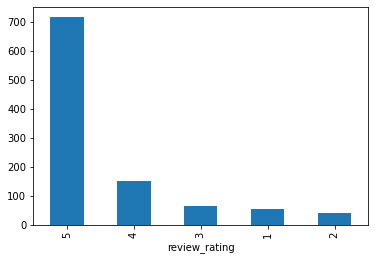

In [110]:
df = pd.DataFrame(data, columns=["review_rating", "Vader Rating"])
 
review_count=df.value_counts("review_rating")
print(review_count)
review_count.plot(kind="bar")

Vader Rating
4    572
5    252
3    101
1     57
2     42
dtype: int64


<AxesSubplot:xlabel='Vader Rating'>

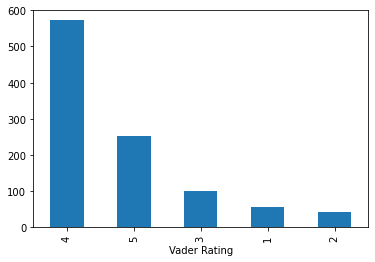

In [109]:
vader_count=df.value_counts("Vader Rating")
print(vader_count)
vader_count.plot(kind="bar")